## BDM Project

### Importing Data

In [56]:
import pandas as pd
import numpy as np

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import os

# Set the search parameters
filename = 'SalesData.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_excel('/content/drive/My Drive/BDM Data/SalesData.xlsx')

In [61]:
df.shape

(223155, 37)

# Pre-Processing

In [62]:
df.shape

(223155, 37)

In [63]:
df.head()

DATA_FROM  QUARTER    TIME_PERIOD CURRENCY_NAME      BUSINESS_UNIT  \
0   Sell-To  CY20-Q1  Calendar Year           USD  Printing Supplies   
1   Sell-To  CY23-Q2  Calendar Year           USD  Printing Supplies   
2   Sell-To  CY22-Q4  Calendar Year           USD  Printing Supplies   
3   Sell-To  CY23-Q1  Calendar Year           USD  Printing Supplies   
4   Sell-To  CY20-Q4  Calendar Year           USD  Printing Supplies   

  CHAI_MAPPING PARTNER_MARKET PARTNER_COUNTRY         PARTNER_CLUSTER  \
0     Supplies  North America             USA  United States Extended   
1     Supplies  North America             USA  United States Extended   
2     Supplies  North America             USA  United States Extended   
3     Supplies  North America             USA  United States Extended   
4     Supplies  North America             USA  United States Extended   

                      PRODUCT_SEGMENT  ... REVENUE_USD UNITS  \
0  Office Printing Solutions Supplies  ...      391.78   4.0   
1  Office Printing Solutions Supplies  ...       70.92   1.0   
2  Office Printing Solutions Supplies  ...      238.73   1.0   
3  Office Printing Solutions Supplies  ...      200.75   1.0   
4  Office Printing Solutions Supplies  ...      406.44   4.0   

  SLS_TTY_IDENTIFIER RAD_VERTICAL EMP_TOTAL  EMPLOYEE_GROUP TAM_PRINT TAM_PS  \
0                NaN          NaN       NaN  NOT IDENTIFIED       NaN    NaN   
1                NaN          NaN       NaN  NOT IDENTIFIED       NaN    NaN   
2                NaN          NaN       NaN  NOT IDENTIFIED       NaN    NaN   
3                NaN          NaN       NaN  NOT IDENTIFIED       NaN    NaN   
4                NaN          NaN       NaN  NOT IDENTIFIED       NaN    NaN   

   REVENUE_PRINT  REVENUE_PS  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  

[5 rows x 37 columns]

In [64]:
df.rename(columns = {'PrarowasRTNrarR_HQ_NrarowasMrar':'PARTNER_HQ_NAME'}, inplace = True)

Removing Useless Columns:

In [65]:
df = df.drop(['CURRENCY_NAME'], axis=1)

In [66]:
#NUMBER OF UNIQUE VALUES
print('BUSINESS UNIT:', df['BUSINESS_UNIT'].nunique())
print('CHAI_MAPPING:', df['CHAI_MAPPING'].nunique())
print('PRODUCT_SEGMENT:', df['PRODUCT_SEGMENT'].nunique())
print('PRODUCT_GROUP:', df['PRODUCT_GROUP'].nunique())
print('PRODUCT_CATEGORY:',df['PRODUCT_CATEGORY'].nunique())
print('PRODUCT_LINE_ID:',df['PRODUCT_LINE_ID'].nunique())

BUSINESS UNIT: 3
CHAI_MAPPING: 8
PRODUCT_SEGMENT: 19
PRODUCT_GROUP: 37
PRODUCT_CATEGORY: 74
PRODUCT_LINE_ID: 107


In [67]:
df = df.drop(['CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_LINE_ID'], axis=1)

In [68]:
#NUMBER OF UNIQUE VALUES
print('PARTNER_MARKET:', df['PARTNER_MARKET'].nunique())
print('PARTNER_CLUSTER:', df['PARTNER_CLUSTER'].nunique())
print('PARTNER_COUNTRY:', df['PARTNER_COUNTRY'].nunique())

PARTNER_MARKET: 7
PARTNER_CLUSTER: 12
PARTNER_COUNTRY: 13


In [69]:
df = df.drop(['PARTNER_CLUSTER', 'PARTNER_COUNTRY'], axis=1)

In [70]:
df.shape

(223155, 30)

In [71]:
print('PARTNER_CUSTOMER_ID:', df['PARTNER_CUSTOMER_ID'].nunique())
print('PARTNER_HQ_NAME:', df['PARTNER_HQ_NAME'].nunique())
print('PARTNER_LEVEL:', df['PARTNER_LEVEL'].nunique())

PARTNER_CUSTOMER_ID: 18970
PARTNER_HQ_NAME: 15
PARTNER_LEVEL: 3


In [72]:
print('OPSI_ID:', df['OPSI_ID'].nunique())
print('IS_OPSI:', df['IS_OPSI'].nunique())
print('ORG_ID:', df['ORG_ID'].nunique())
print('ORGANIZATION_EXTENDED_NAME:', df['ORGANIZATION_EXTENDED_NAME'].nunique())
print('ST_ID:', df['ST_ID'].nunique())
print('SALES_TERRITORY_EXTENDED_NAME:', df['SALES_TERRITORY_EXTENDED_NAME'].nunique())
print('ONLINE_FLAG:', df['ONLINE_FLAG'].nunique())
print('EMPLOYEE_GROUP:', df['EMPLOYEE_GROUP'].nunique())

OPSI_ID: 15918
IS_OPSI: 2
ORG_ID: 7693
ORGANIZATION_EXTENDED_NAME: 7498
ST_ID: 2418
SALES_TERRITORY_EXTENDED_NAME: 2409
ONLINE_FLAG: 2
EMPLOYEE_GROUP: 6


In [73]:
#Finding the missing values:
df.isna().sum()

DATA_FROM                             0
QUARTER                               0
TIME_PERIOD                           0
BUSINESS_UNIT                         0
PARTNER_MARKET                        0
PRODUCT_CATEGORY                      0
PARTNER_HQ_NAME                       0
PARTNER_ID                            0
PARTNER_CUSTOMER_ID               26874
PARTNER_LEVEL                         0
OPSI_ID                           75970
IS_OPSI                               0
ORG_ID                           100464
ORGANIZATION_EXTENDED_NAME       100646
ST_ID                            100579
SALES_TERRITORY_EXTENDED_NAME    102228
ONLINE_FLAG                       84813
REAL_UNITS                        62035
PRODUCT_UNITS                      1350
REVENUE_LC                          154
REVENUE_USD                         154
UNITS                              9948
SLS_TTY_IDENTIFIER               141585
RAD_VERTICAL                     102958
EMP_TOTAL                        102545
EMPLOYEE_GROUP                    12131
TAM_PRINT                        141585
TAM_PS                           141585
REVENUE_PRINT                    141585
REVENUE_PS                       141585
dtype: int64

Removing columns with lot of missing values (More than half the total datapoints):

In [74]:
df = df.drop(['OPSI_ID','ORG_ID', 'ORGANIZATION_EXTENDED_NAME','ST_ID','SALES_TERRITORY_EXTENDED_NAME','REAL_UNITS','SLS_TTY_IDENTIFIER','RAD_VERTICAL','EMP_TOTAL','TAM_PRINT','TAM_PS','REVENUE_PRINT','REVENUE_PS'], axis=1)

In [75]:
df = df.drop(['REVENUE_LC', 'TIME_PERIOD'], axis=1)

In [76]:
df.head()

DATA_FROM  QUARTER      BUSINESS_UNIT PARTNER_MARKET    PRODUCT_CATEGORY  \
0   Sell-To  CY20-Q1  Printing Supplies  North America  OPS Toner Supplies   
1   Sell-To  CY23-Q2  Printing Supplies  North America  OPS Toner Supplies   
2   Sell-To  CY22-Q4  Printing Supplies  North America  OPS Toner Supplies   
3   Sell-To  CY23-Q1  Printing Supplies  North America  OPS Toner Supplies   
4   Sell-To  CY20-Q4  Printing Supplies  North America  OPS Toner Supplies   

                                     PARTNER_HQ_NAME    PARTNER_ID  \
0  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
1  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
2  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
3  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
4  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   

  PARTNER_CUSTOMER_ID   PARTNER_LEVEL  IS_OPSI ONLINE_FLAG  PRODUCT_UNITS  \
0               13690  Power Services     True         NaN            4.0   
1               13438  Power Services     True           N            1.0   
2               15330  Power Services     True           N            1.0   
3               15322  Power Services     True           N            1.0   
4               13521  Power Services     True         NaN            4.0   

   REVENUE_USD  UNITS  EMPLOYEE_GROUP  
0       391.78    4.0  NOT IDENTIFIED  
1        70.92    1.0  NOT IDENTIFIED  
2       238.73    1.0  NOT IDENTIFIED  
3       200.75    1.0  NOT IDENTIFIED  
4       406.44    4.0  NOT IDENTIFIED

Processing Date from Quarters:

In [77]:
typ = df['QUARTER'].str.slice(0, 2, 1)
year = '20' + df['QUARTER'].str.slice(2, 4, 1)
qtr = df['QUARTER'].str.slice(5, 7, 1)

In [78]:
saledate = []
for i in range(0,len(typ)):
  st = ""
  if(typ[i] == 'CY'):
    if qtr[i] == 'Q1':
      st = st + year[i] + '-01' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-04' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-07' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-10' + '-01'
  else:
    if qtr[i] == 'Q1':
      st = st + year[i] + '-11' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-02' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-05' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-08' + '-01'
  saledate.append(st)

In [79]:
from datetime import timedelta
df['DATE'] = saledate
df['DATE'] = pd.to_datetime(df['DATE'])
df

DATA_FROM  QUARTER      BUSINESS_UNIT PARTNER_MARKET  \
0        Sell-To  CY20-Q1  Printing Supplies  North America   
1        Sell-To  CY23-Q2  Printing Supplies  North America   
2        Sell-To  CY22-Q4  Printing Supplies  North America   
3        Sell-To  CY23-Q1  Printing Supplies  North America   
4        Sell-To  CY20-Q4  Printing Supplies  North America   
...          ...      ...                ...            ...   
223150   Sell-To  FY21-Q3  Printing Supplies  North America   
223151   Sell-To  FY22-Q4  Printing Supplies  North America   
223152   Sell-To  FY21-Q4        Printing HW  North America   
223153   Sell-To  FY20-Q3        Printing HW  North America   
223154   Sell-To  FY20-Q1  Printing Supplies  North America   

          PRODUCT_CATEGORY                                    PARTNER_HQ_NAME  \
0       OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
1       OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
2       OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
3       OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
4       OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
...                    ...                                                ...   
223150  OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
223151  OPS Toner Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   
223152  Office Non Managed  Frarowascswasmwaslrar Communwascrarowastwasons...   
223153      Office Managed  Frarowascswasmwaslrar Communwascrarowastwasons...   
223154    OPS Ink Supplies  Frarowascswasmwaslrar Communwascrarowastwasons...   

          PARTNER_ID PARTNER_CUSTOMER_ID   PARTNER_LEVEL  IS_OPSI ONLINE_FLAG  \
0       123HSE4-9637               13690  Power Services     True         NaN   
1       123HSE4-9637               13438  Power Services     True           N   
2       123HSE4-9637               15330  Power Services     True           N   
3       123HSE4-9637               15322  Power Services     True           N   
4       123HSE4-9637               13521  Power Services     True         NaN   
...              ...                 ...             ...      ...         ...   
223150  123HSE4-9637               67519  Power Services     True           N   
223151  123HSE4-9637               15303  Power Services     True           N   
223152  123HSE4-9637               26103  Power Services     True           N   
223153  123HSE4-9637              WS7038  Power Services     True         NaN   
223154  123HSE4-9637               67425  Power Services     True         NaN   

        PRODUCT_UNITS  REVENUE_USD  UNITS  EMPLOYEE_GROUP       DATE  
0                 4.0       391.78    4.0  NOT IDENTIFIED 2020-01-01  
1                 1.0        70.92    1.0  NOT IDENTIFIED 2023-04-01  
2                 1.0       238.73    1.0  NOT IDENTIFIED 2022-10-01  
3                 1.0       200.75    1.0  NOT IDENTIFIED 2023-01-01  
4                 4.0       406.44    4.0  NOT IDENTIFIED 2020-10-01  
...               ...          ...    ...             ...        ...  
223150            3.0       500.36    3.0       506541000 2021-05-01  
223151            9.0      1612.35    9.0       506541000 2022-08-01  
223152            1.0       783.41    1.0          > 1000 2021-08-01  
223153            2.0      3672.32    2.0     065410-2023 2020-05-01  
223154            1.0       100.29    1.0          > 1000 2020-11-01  

[223155 rows x 16 columns]

In [80]:
import datetime
from datetime import datetime
saledate2 = []
for i in saledate:
  dt = datetime.strptime(i, '%Y-%m-%d')
  saledate2.append(dt)

In [81]:
df = df.drop(['EMPLOYEE_GROUP', 'QUARTER'], axis = 1)

In [82]:
df['DATE'] = saledate2
df

DATA_FROM      BUSINESS_UNIT PARTNER_MARKET    PRODUCT_CATEGORY  \
0        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
1        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
2        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
3        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
4        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
...          ...                ...            ...                 ...   
223150   Sell-To  Printing Supplies  North America  OPS Toner Supplies   
223151   Sell-To  Printing Supplies  North America  OPS Toner Supplies   
223152   Sell-To        Printing HW  North America  Office Non Managed   
223153   Sell-To        Printing HW  North America      Office Managed   
223154   Sell-To  Printing Supplies  North America    OPS Ink Supplies   

                                          PARTNER_HQ_NAME    PARTNER_ID  \
0       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
1       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
2       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
3       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
4       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
...                                                   ...           ...   
223150  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223151  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223152  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223153  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223154  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   

       PARTNER_CUSTOMER_ID   PARTNER_LEVEL  IS_OPSI ONLINE_FLAG  \
0                    13690  Power Services     True         NaN   
1                    13438  Power Services     True           N   
2                    15330  Power Services     True           N   
3                    15322  Power Services     True           N   
4                    13521  Power Services     True         NaN   
...                    ...             ...      ...         ...   
223150               67519  Power Services     True           N   
223151               15303  Power Services     True           N   
223152               26103  Power Services     True           N   
223153              WS7038  Power Services     True         NaN   
223154               67425  Power Services     True         NaN   

        PRODUCT_UNITS  REVENUE_USD  UNITS       DATE  
0                 4.0       391.78    4.0 2020-01-01  
1                 1.0        70.92    1.0 2023-04-01  
2                 1.0       238.73    1.0 2022-10-01  
3                 1.0       200.75    1.0 2023-01-01  
4                 4.0       406.44    4.0 2020-10-01  
...               ...          ...    ...        ...  
223150            3.0       500.36    3.0 2021-05-01  
223151            9.0      1612.35    9.0 2022-08-01  
223152            1.0       783.41    1.0 2021-08-01  
223153            2.0      3672.32    2.0 2020-05-01  
223154            1.0       100.29    1.0 2020-11-01  

[223155 rows x 14 columns]

In [83]:
BU = df['BUSINESS_UNIT'].unique()
MARKET = df['PARTNER_MARKET'].unique()

### DESCRIPTIVE DATA:

In [84]:
import matplotlib.pyplot as plt

FOR UNITS:


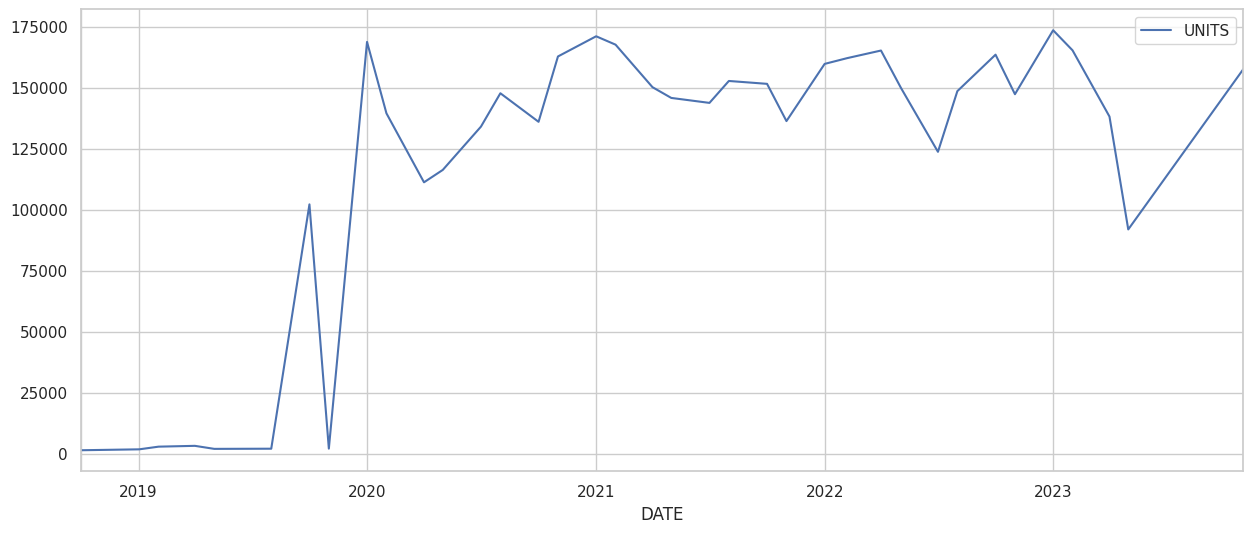

FOR REVENUE:


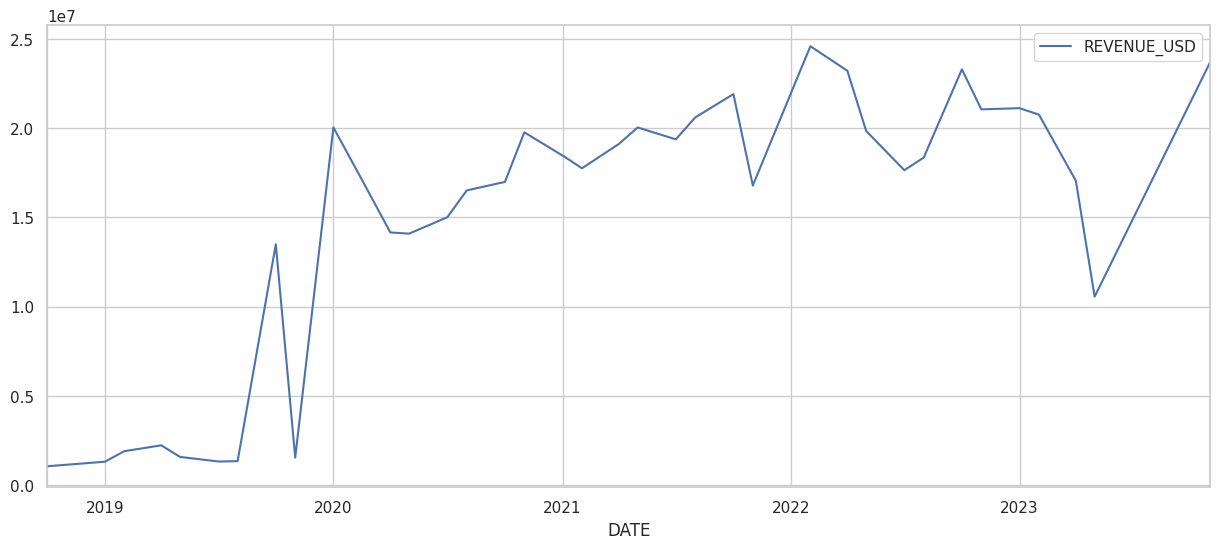

In [85]:
import matplotlib.pyplot as plt
df2 = df[['DATE','UNITS','REVENUE_USD']]
df2.set_index('DATE', inplace=True)
freq = 'D'  # Daily frequency
df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
df_re.replace(0, np.nan, inplace=True)
df_re['UNITS'].interpolate(method='linear', inplace=True)
df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)
df_re_units = df_re.copy()
df_re_units = df_re_units.drop(['REVENUE_USD'], axis=1)
df_re_revenue = df_re.copy()
df_re_revenue = df_re_revenue.drop(['UNITS'], axis=1)
print("FOR UNITS:")
df_re_units.plot(figsize = (15, 6))
plt.show()
print("FOR REVENUE:")
df_re_revenue.plot(figsize = (15, 6))
plt.show()

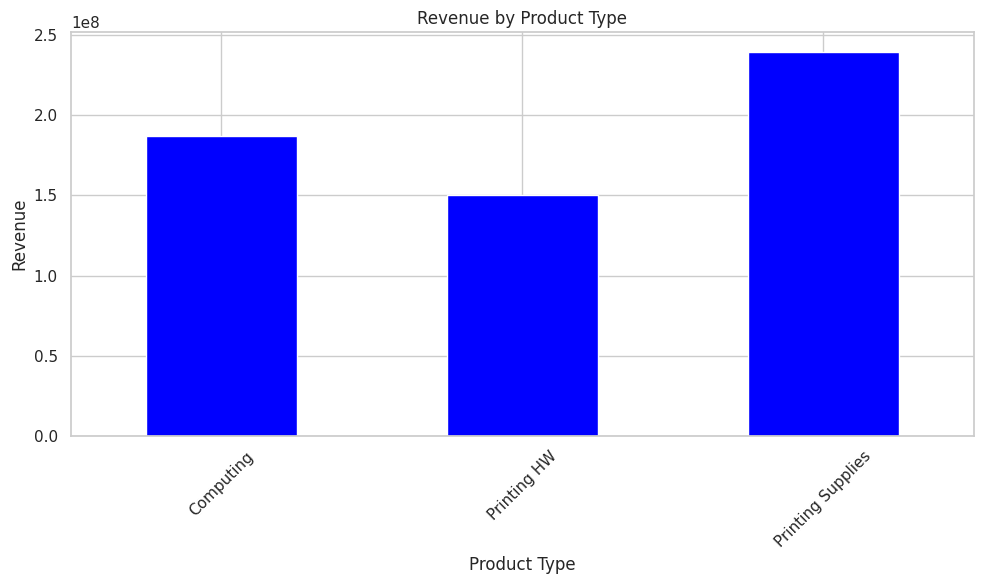

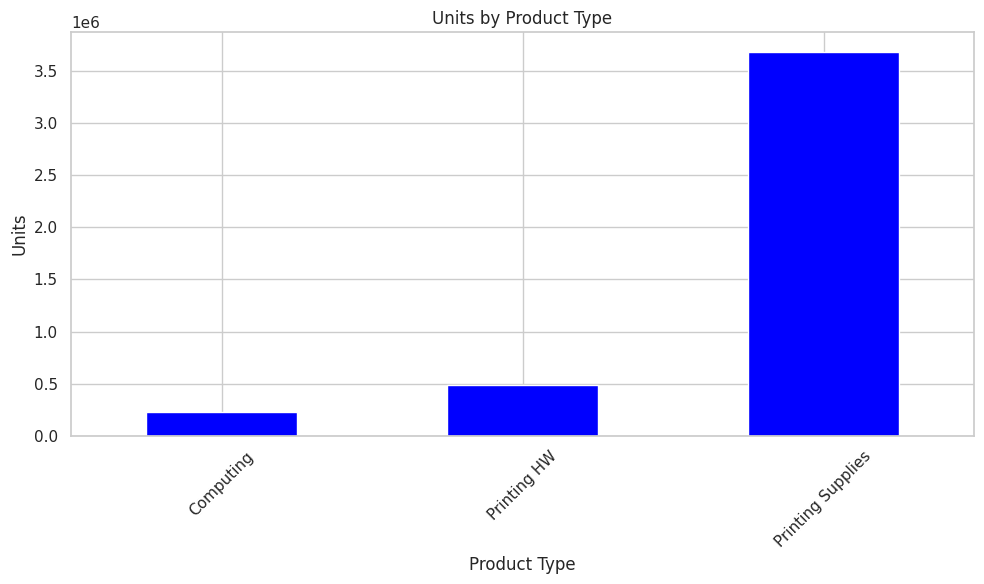

In [86]:
import matplotlib.pyplot as plt
revenue_by_product = df.groupby('BUSINESS_UNIT')['REVENUE_USD'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Product Type')
plt.ylabel('Revenue')
plt.title('Revenue by Product Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("")
revenue_by_product = df.groupby('BUSINESS_UNIT')['UNITS'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Product Type')
plt.ylabel('Units')
plt.title('Units by Product Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

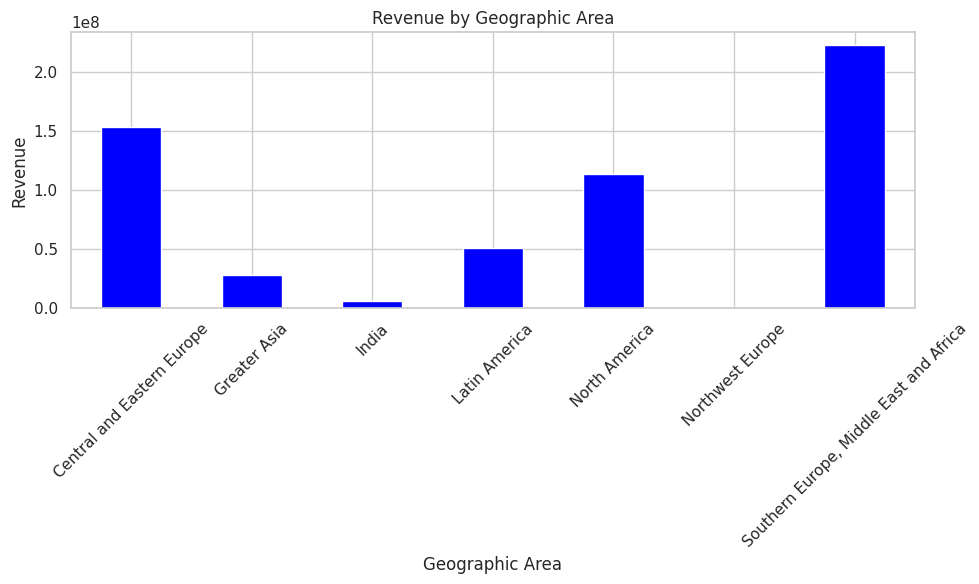

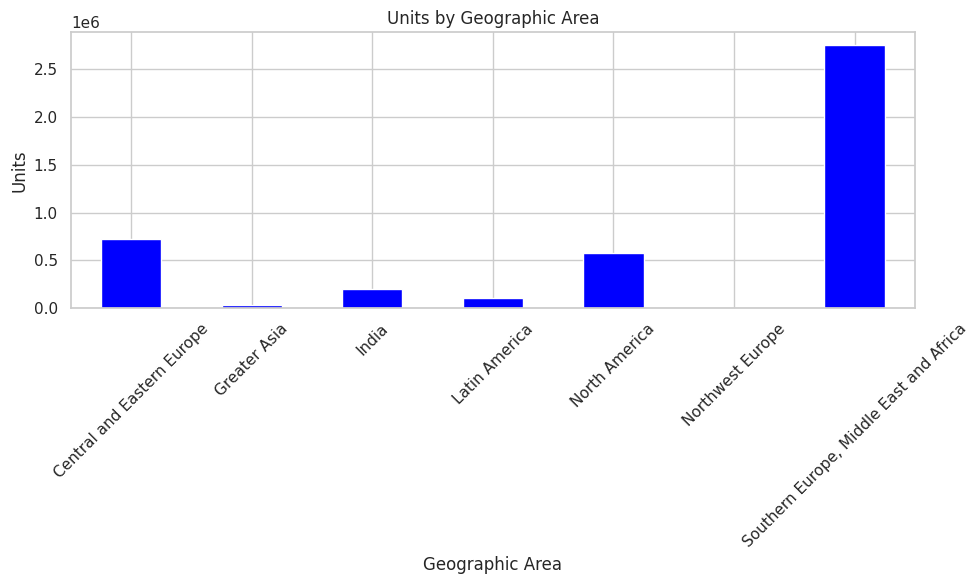

In [87]:
import matplotlib.pyplot as plt
revenue_by_product = df.groupby('PARTNER_MARKET')['REVENUE_USD'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Geographic Area')
plt.ylabel('Revenue')
plt.title('Revenue by Geographic Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("")
revenue_by_product = df.groupby('PARTNER_MARKET')['UNITS'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Geographic Area')
plt.ylabel('Units')
plt.title('Units by Geographic Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

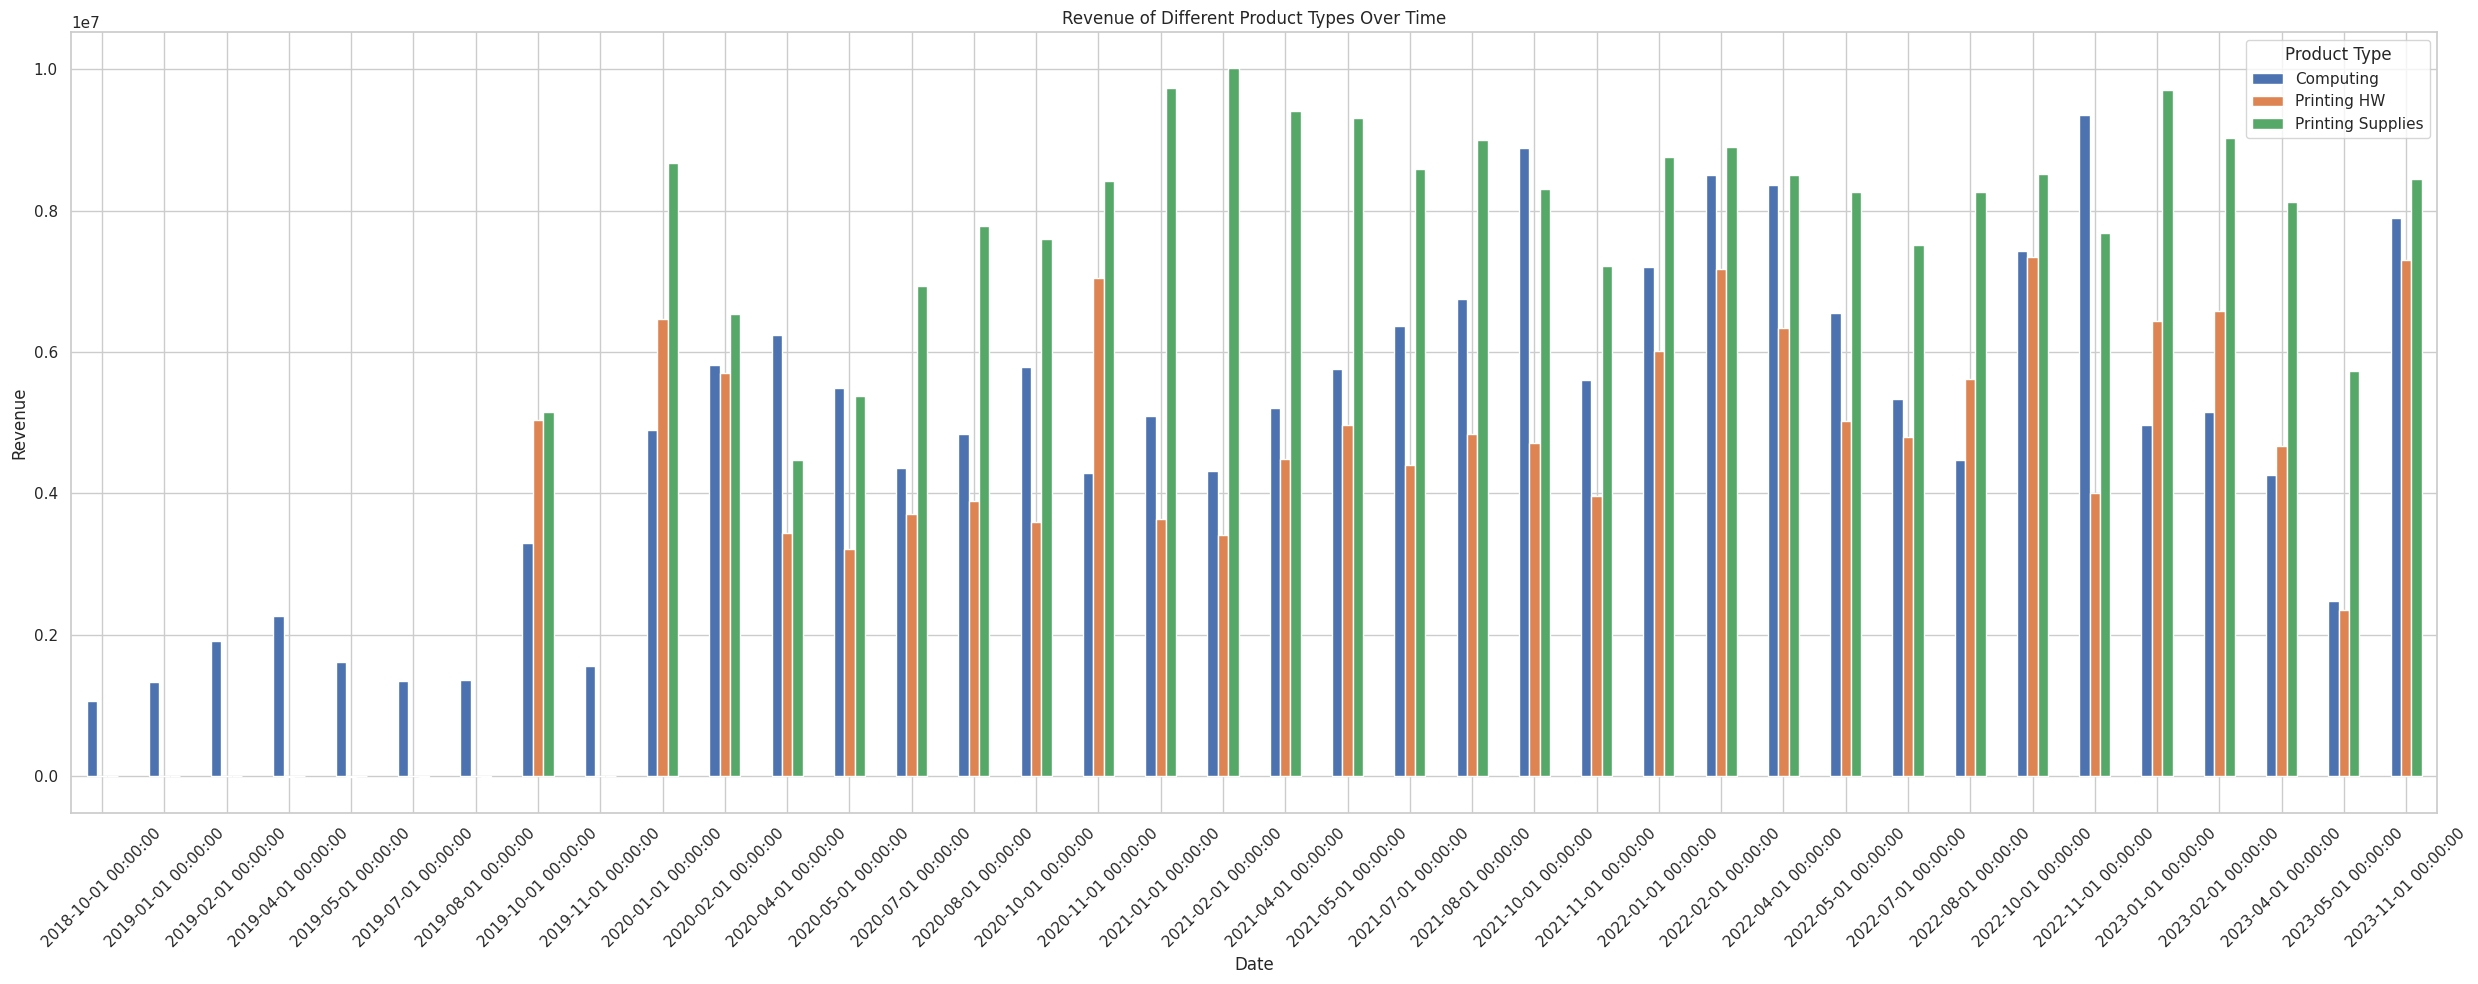

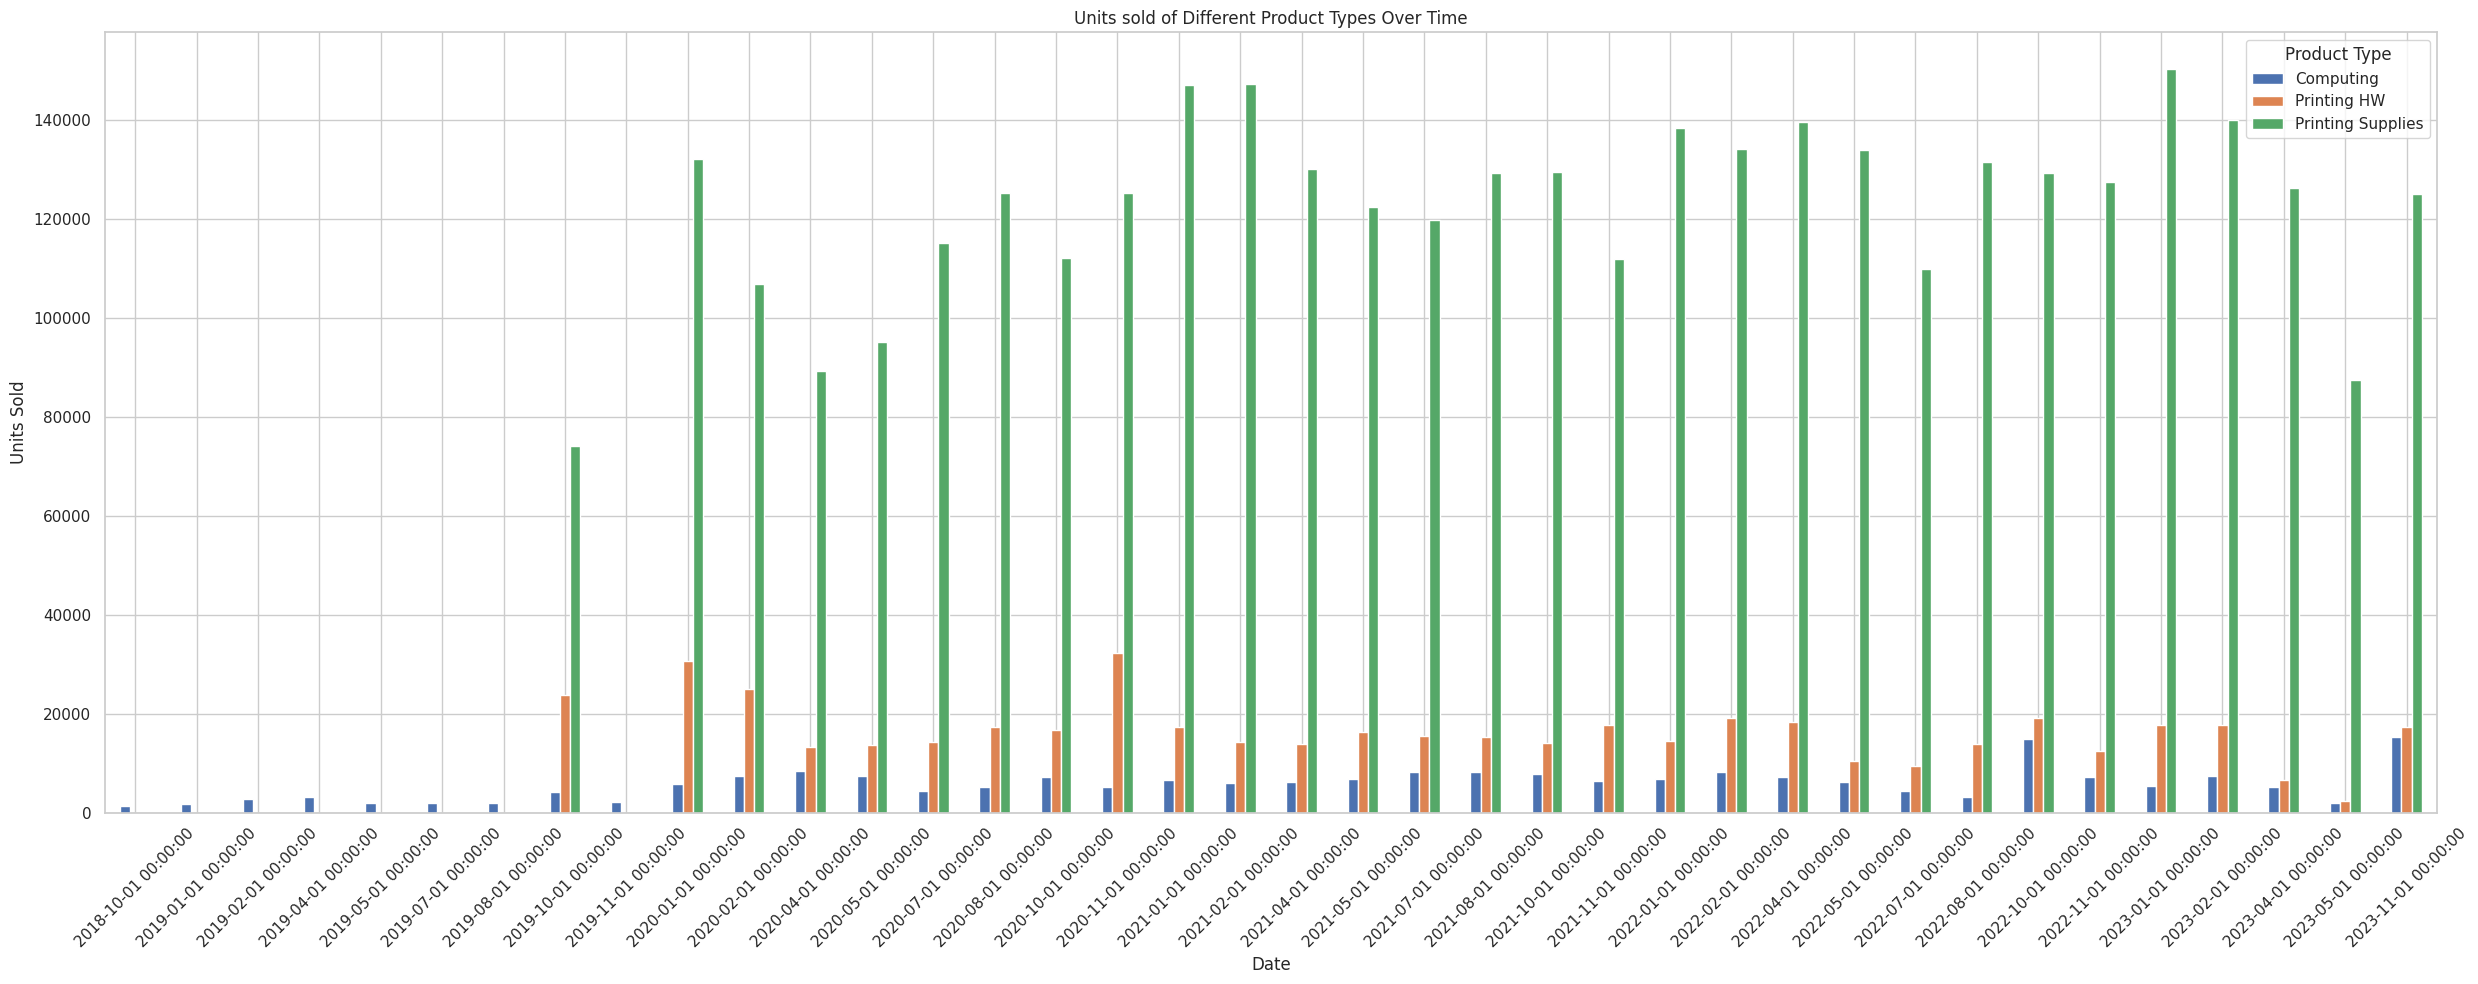

In [88]:
import matplotlib.pyplot as plt
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'BUSINESS_UNIT'])['REVENUE_USD'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Different Product Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()
print("")
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'BUSINESS_UNIT'])['UNITS'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units sold of Different Product Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

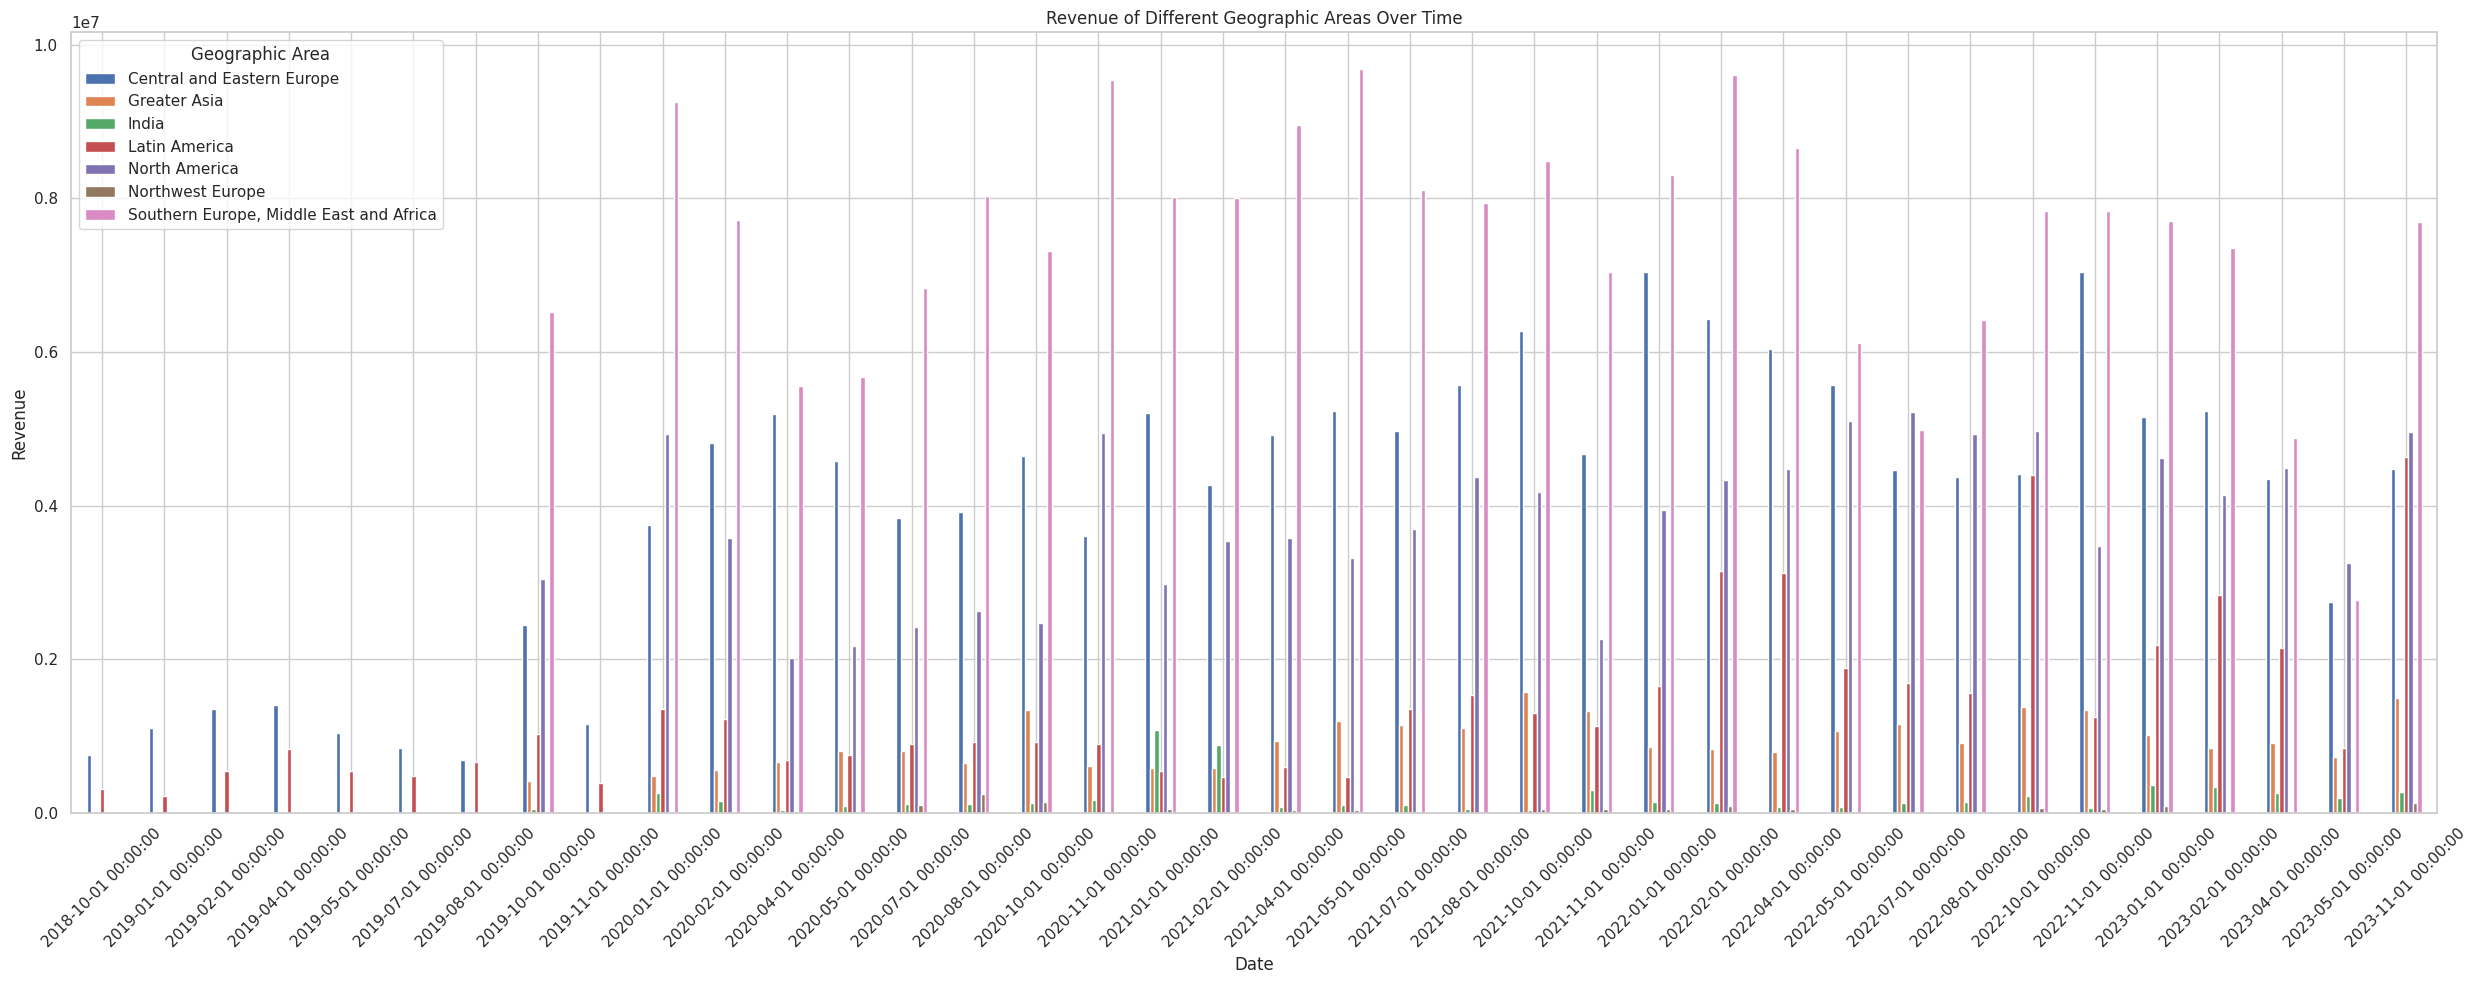

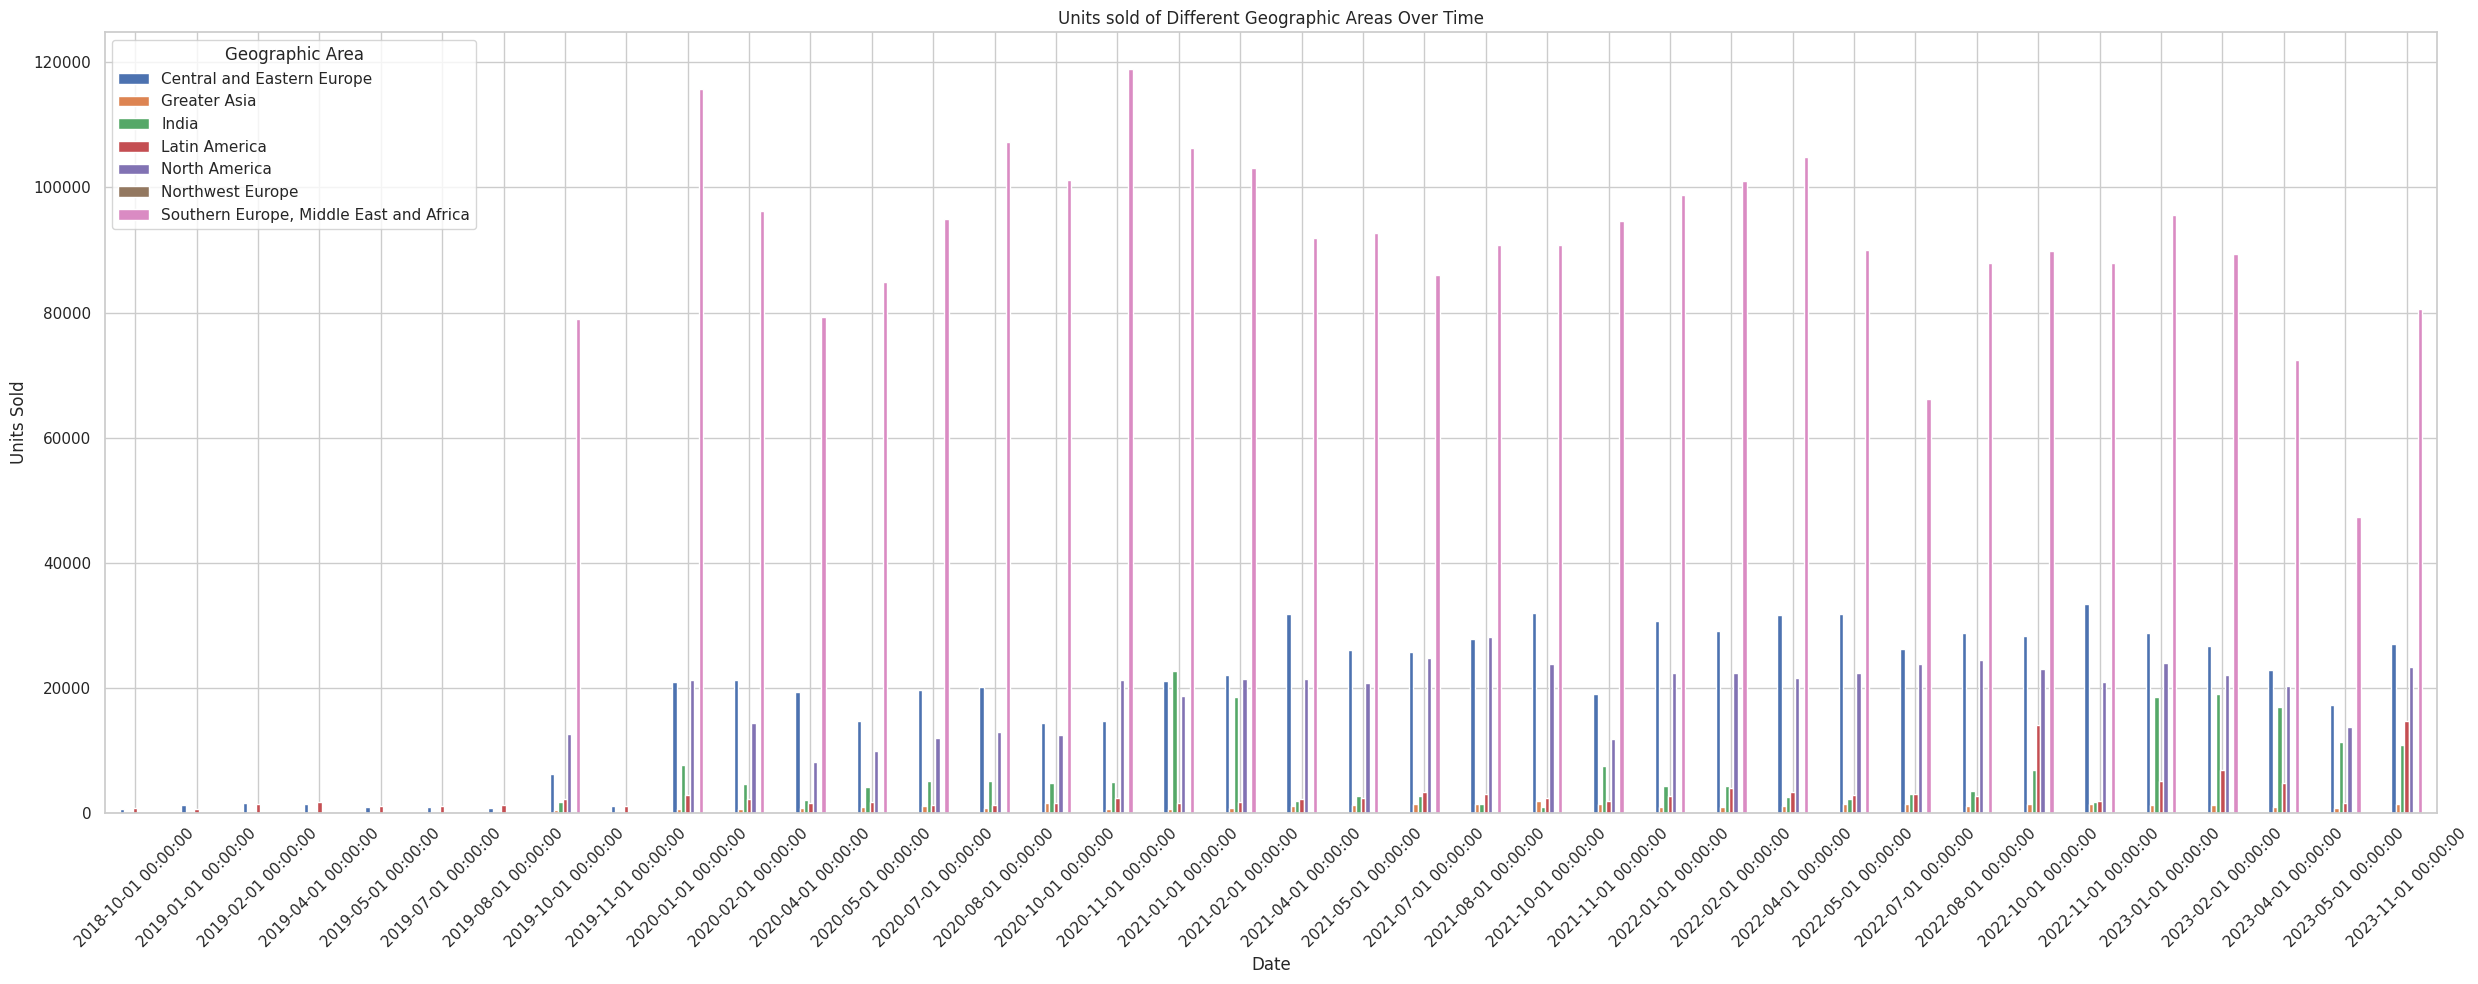

In [89]:
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'PARTNER_MARKET'])['REVENUE_USD'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Different Geographic Areas Over Time')
plt.xticks(rotation=45)
plt.legend(title='Geographic Area')
plt.tight_layout()
plt.show()
print("")
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'PARTNER_MARKET'])['UNITS'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units sold of Different Geographic Areas Over Time')
plt.xticks(rotation=45)
plt.legend(title='Geographic Area')
plt.tight_layout()
plt.show()

#### Pareto Chart:

FOR REVENUE:

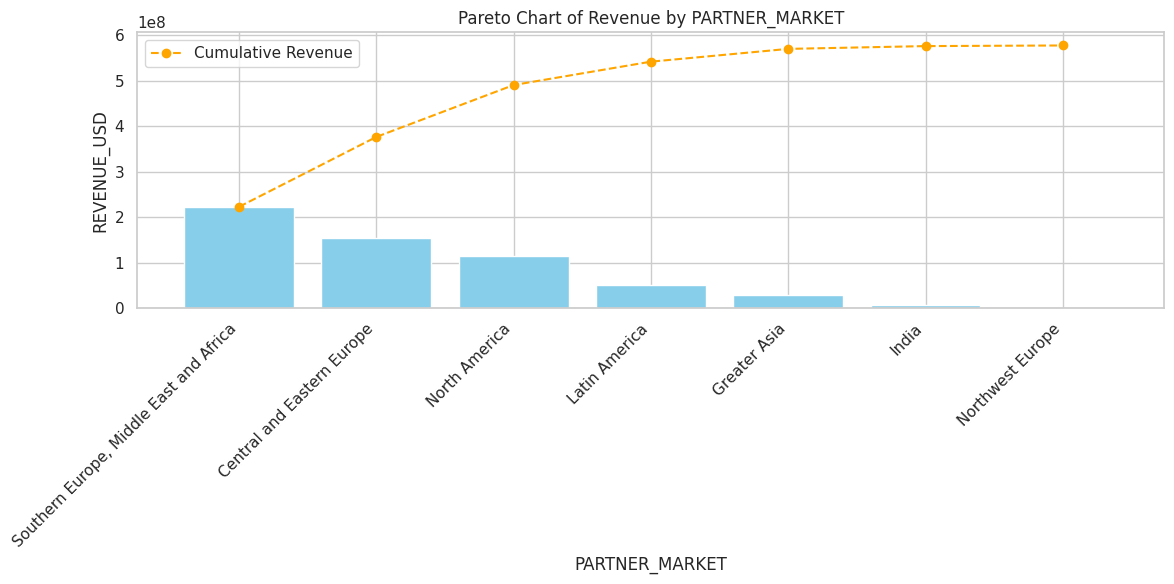

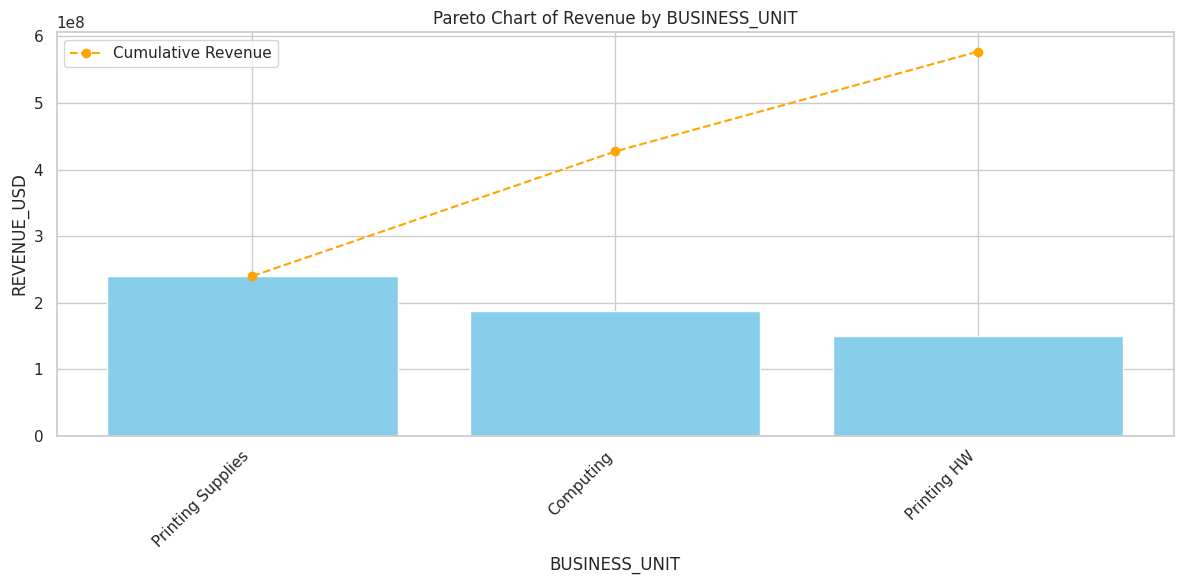

In [90]:
def pareto_chart(dataframe, category_column, value_column, title):
    grouped = dataframe.groupby(category_column)[value_column].sum().reset_index()
    sorted_df = grouped.sort_values(by=value_column, ascending=False)
    sorted_df['Cumulative Revenue'] = sorted_df[value_column].cumsum()
    plt.figure(figsize=(12, 6))
    #plt.bar(sorted_df.index, sorted_df[value_column], tick_label=sorted_df[category_column], color='skyblue')
    plt.bar(sorted_df[category_column],sorted_df[value_column], color='skyblue')
    #plt.plot(sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    plt.plot(sorted_df[category_column],sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(category_column)
    plt.ylabel(value_column)
    plt.title(title)
    plt.legend(['Cumulative Revenue'], loc='upper left')
    plt.tight_layout()
    plt.show()

pareto_chart(df, 'PARTNER_MARKET', 'REVENUE_USD', 'Pareto Chart of Revenue by PARTNER_MARKET')
print("")
# Create a Pareto chart for product units
pareto_chart(df, 'BUSINESS_UNIT', 'REVENUE_USD', 'Pareto Chart of Revenue by BUSINESS_UNIT')

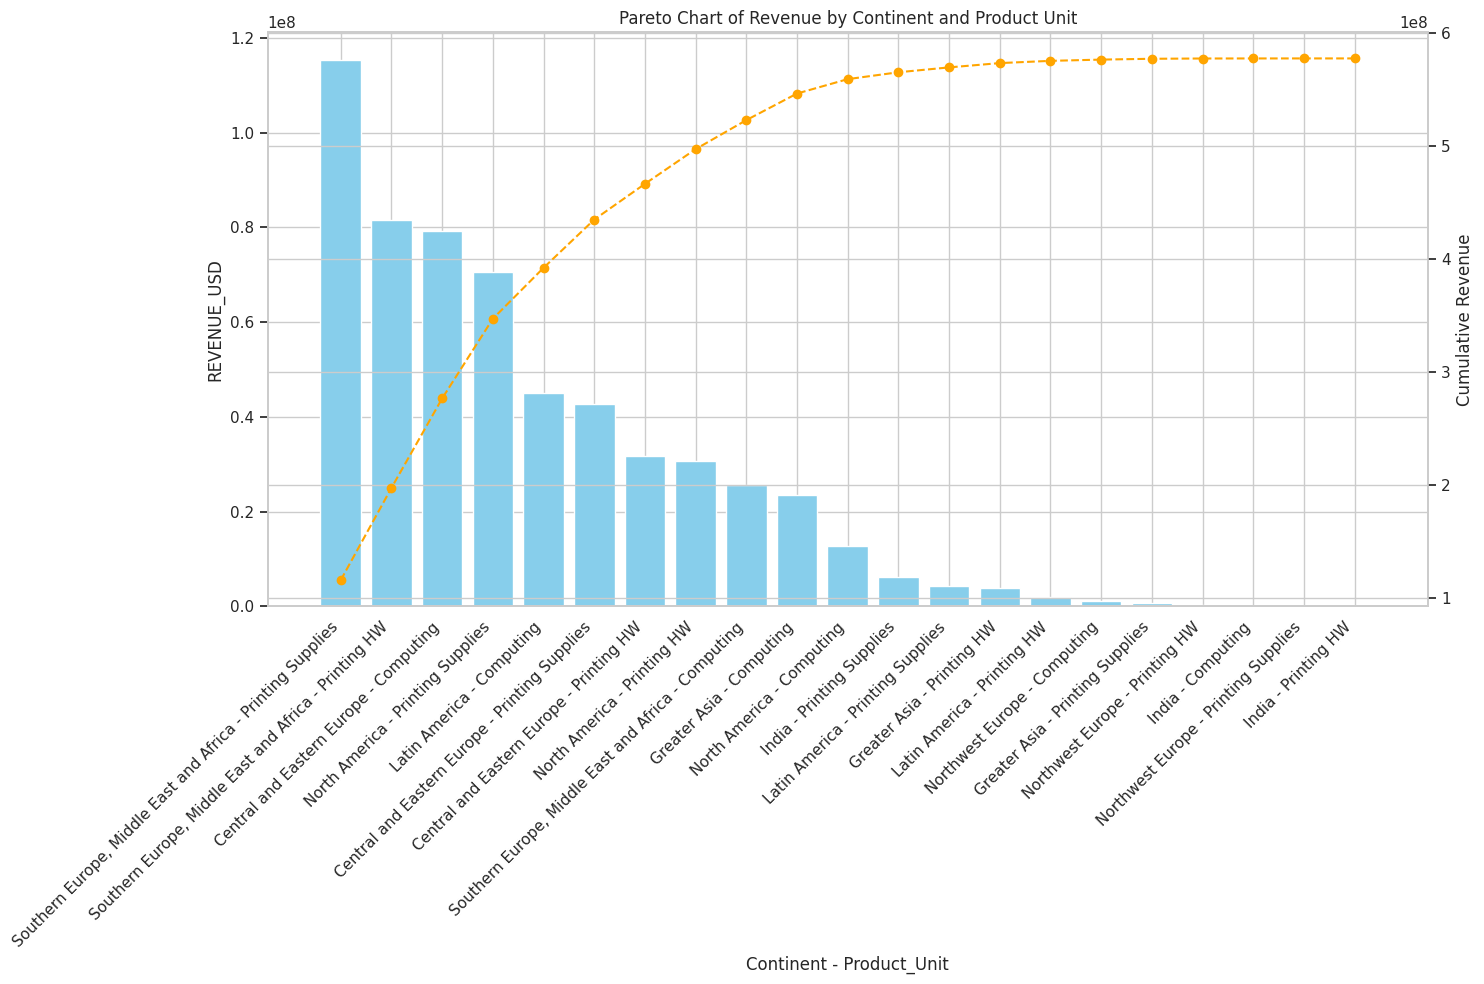

In [91]:
def plot_pareto(data, combined_category_column, value_column, title):
    data[combined_category_column] = data['PARTNER_MARKET'] + ' - ' + data['BUSINESS_UNIT']

    grouped = data.groupby(combined_category_column)[value_column].sum().reset_index()

    # Sort the data by revenue in descending order
    sorted_df = grouped.sort_values(by=value_column, ascending=False)

    # Calculate cumulative revenue
    sorted_df['Cumulative Revenue'] = sorted_df[value_column].cumsum()

    # Create the Pareto chart
    plt.figure(figsize=(15, 10))
    ax = plt.gca()
    ax.bar(sorted_df[combined_category_column], sorted_df[value_column], color='skyblue')
    ax2 = ax.twinx()
    ax2.plot(sorted_df[combined_category_column], sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    ax.set_xticklabels(sorted_df[combined_category_column], rotation=45, ha='right')
    ax.set_xlabel(combined_category_column)
    ax.set_ylabel(value_column)
    ax2.set_ylabel('Cumulative Revenue')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Call the function to create a Pareto chart combining 'Continent' and 'Product_Unit'
plot_pareto(df, 'Continent - Product_Unit', 'REVENUE_USD', 'Pareto Chart of Revenue by Continent and Product Unit')

FOR UNITS SOLD:

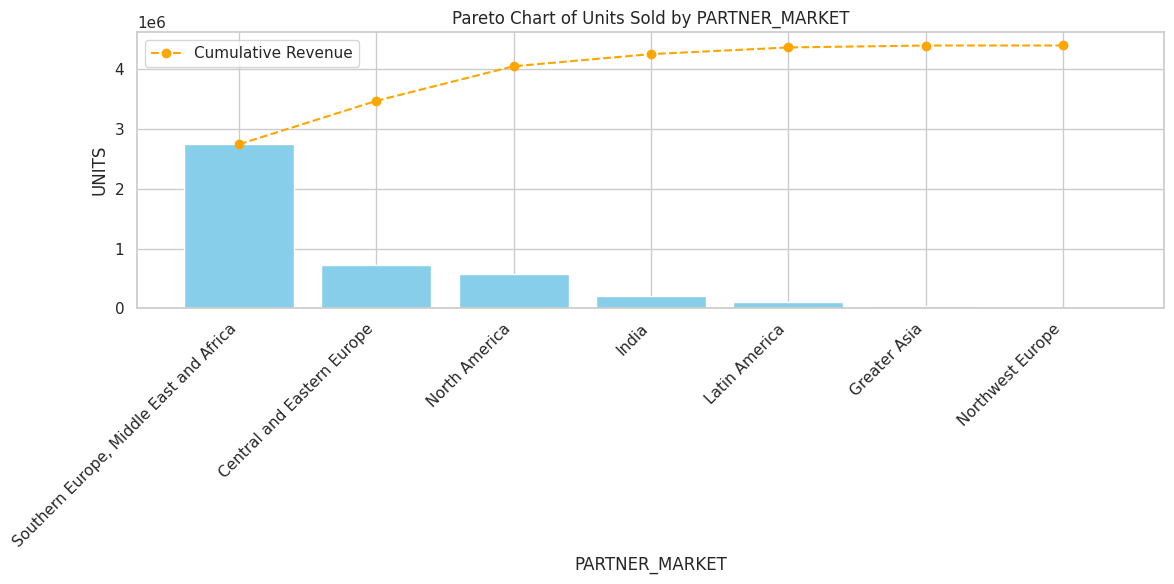

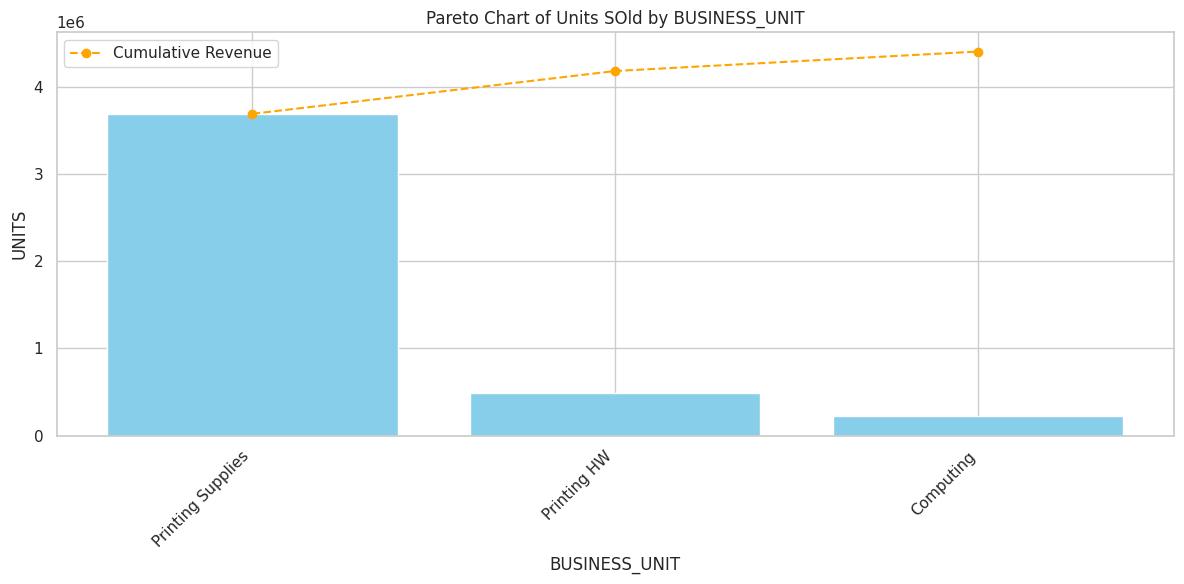

In [92]:
pareto_chart(df, 'PARTNER_MARKET', 'UNITS', 'Pareto Chart of Units Sold by PARTNER_MARKET')
print("")
# Create a Pareto chart for product units
pareto_chart(df, 'BUSINESS_UNIT', 'UNITS', 'Pareto Chart of Units SOld by BUSINESS_UNIT')

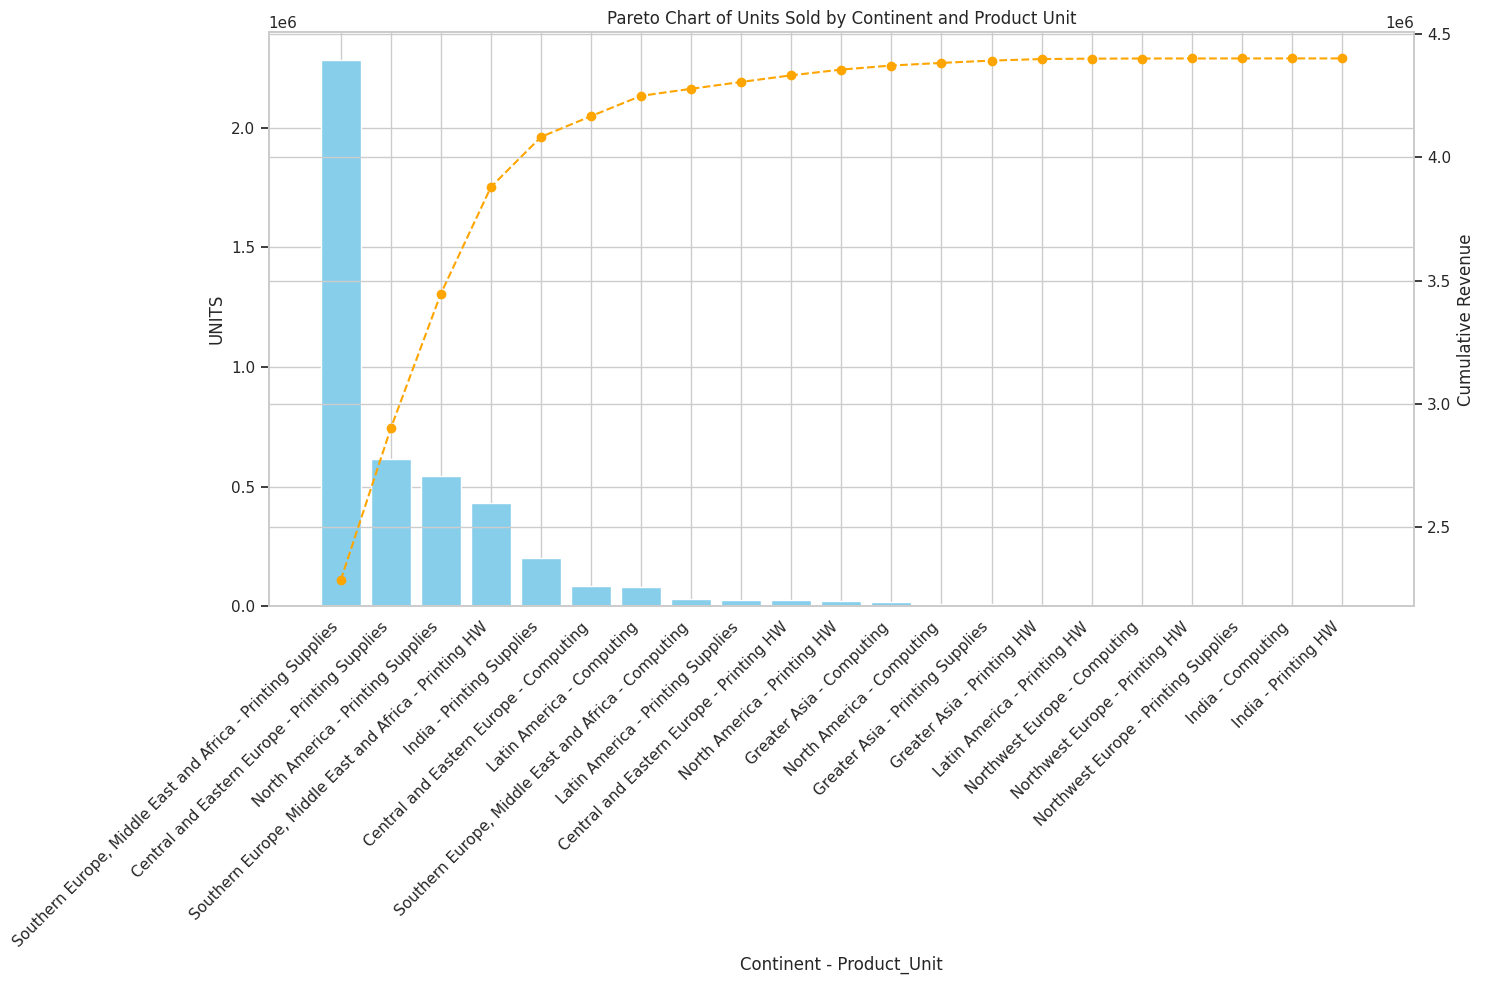

In [93]:
# Call the function to create a Pareto chart combining 'Continent' and 'Product_Unit'
plot_pareto(df, 'Continent - Product_Unit', 'UNITS', 'Pareto Chart of Units Sold by Continent and Product Unit')

### Time - Forecasting using ARIMA:

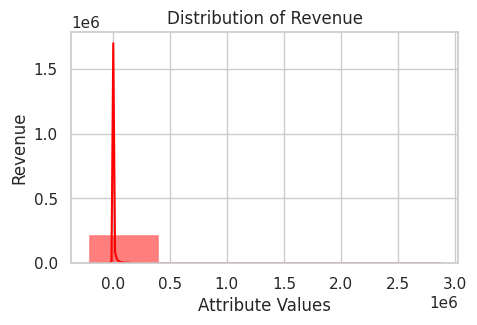

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='REVENUE_USD', kde=True, bins=5, color='red')
plt.title('Distribution of Revenue')
plt.xlabel('Attribute Values')
plt.ylabel('Revenue')
plt.show()

In [95]:
mean_value = df['REVENUE_USD'].mean()
median_value = df['REVENUE_USD'].median()
print(f"Mean: {mean_value}, Median: {median_value}")

Mean: 2588.832444981861, Median: 161.42


In [96]:
df['REVENUE_USD'].fillna(median_value, inplace=True)

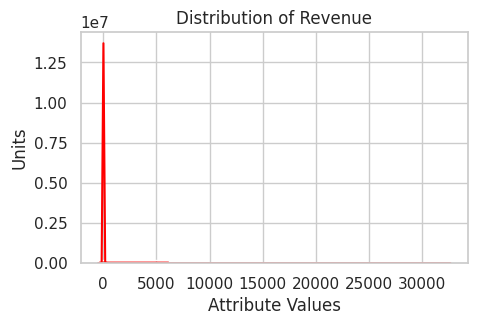

In [97]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='UNITS', kde=True, bins=5, color='red')
plt.title('Distribution of Revenue')
plt.xlabel('Attribute Values')
plt.ylabel('Units')
plt.show()

In [98]:
mean_value = df['UNITS'].mean()
median_value = df['UNITS'].median()
print(f"Mean: {mean_value}, Median: {median_value}")

Mean: 20.640241643098022, Median: 2.0


In [99]:
df['UNITS'].fillna(median_value, inplace=True)

In [100]:
df.isna().sum()

DATA_FROM                       0
BUSINESS_UNIT                   0
PARTNER_MARKET                  0
PRODUCT_CATEGORY                0
PARTNER_HQ_NAME                 0
PARTNER_ID                      0
PARTNER_CUSTOMER_ID         26874
PARTNER_LEVEL                   0
IS_OPSI                         0
ONLINE_FLAG                 84813
PRODUCT_UNITS                1350
REVENUE_USD                     0
UNITS                           0
DATE                            0
Continent - Product_Unit        0
dtype: int64

In [101]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
def arima_func(dataframe):
  df2 = dataframe[['DATE','UNITS','REVENUE_USD']]
  df2.set_index('DATE', inplace=True)
  freq = 'D'  # Daily frequency
  df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
  df_re.replace(0, np.nan, inplace=True)
  df_re['UNITS'].interpolate(method='linear', inplace=True)
  df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)
  train_size = int(0.75 * len(df_re))
  train, test = df_re.iloc[:train_size], df_re.iloc[train_size:]
  # Forecast future demand
  ord = (5, 1, 0)
  model = ARIMA(train['UNITS'], order=ord)
  model_fit = model.fit()
  forecast_steps = len(test)
  forecast = model_fit.forecast(steps=forecast_steps)
  plt.figure(figsize=(6, 3))
  plt.plot(train.index, train['UNITS'], label='Train Data')
  plt.plot(test.index, test['UNITS'], label='Test Data')
  plt.plot(test.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Units')
  plt.title('ARIMA Forecast for Units')
  plt.legend()
  plt.show()
  mape = mean_absolute_percentage_error(test['UNITS'], forecast)
  print(f"Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: {mape:.2f}%")
  # Forecast future Revenue
  ord = (5, 1, 0)
  model = ARIMA(train['REVENUE_USD'], order=ord)
  model_fit = model.fit()
  forecast_steps = len(test)
  forecast = model_fit.forecast(steps=forecast_steps)
  plt.figure(figsize=(6, 3))
  plt.plot(train.index, train['REVENUE_USD'], label='Train Data')
  plt.plot(test.index, test['REVENUE_USD'], label='Test Data')
  plt.plot(test.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Revenue')
  plt.title('ARIMA Forecast for Revenue')
  plt.legend()
  plt.show()
  mape = mean_absolute_percentage_error(test['REVENUE_USD'], forecast)
  print(f"Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: {mape:.2f}%")

#### BU:


--------------------FOR THE BUSINESS UNIT: Printing Supplies ----------------------------


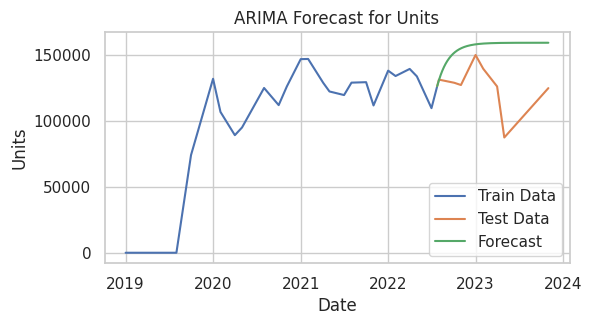

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.31%


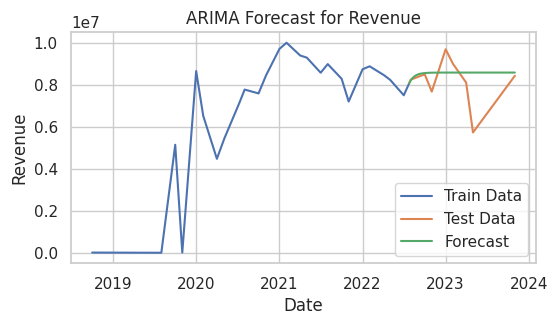

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.13%

--------------------FOR THE BUSINESS UNIT: Printing HW ----------------------------


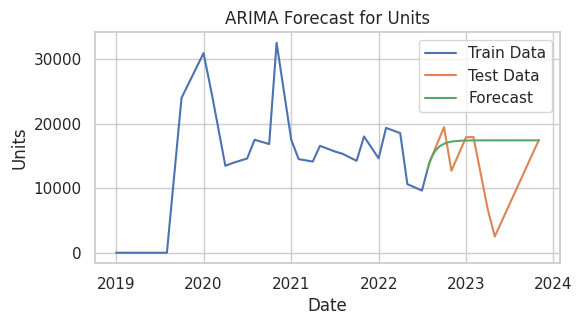

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.79%


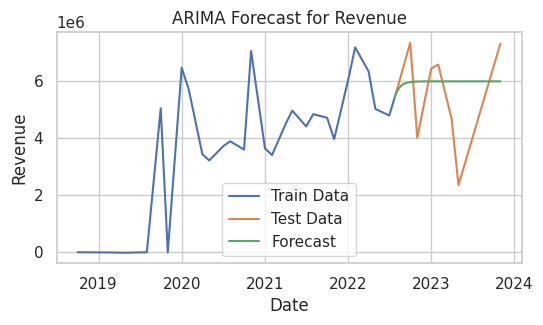

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.28%

--------------------FOR THE BUSINESS UNIT: Computing ----------------------------


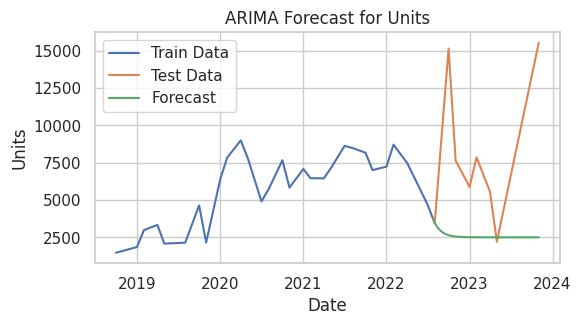

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.61%


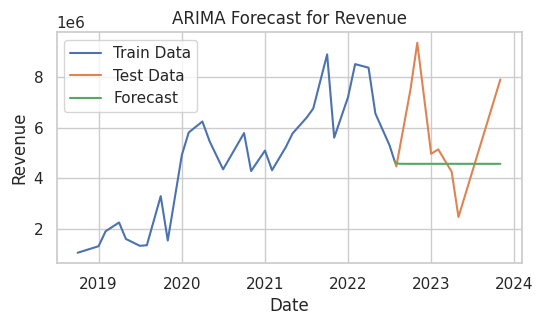

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.25%


In [102]:
for i in BU:
  print('')
  print('--------------------FOR THE BUSINESS UNIT:', i, '----------------------------')
  dft = df[df['BUSINESS_UNIT'] == i]
  arima_func(dft)
  #dft

#### MARKET:


--------------------FOR THE PARTNER MARKET: North America ----------------------------


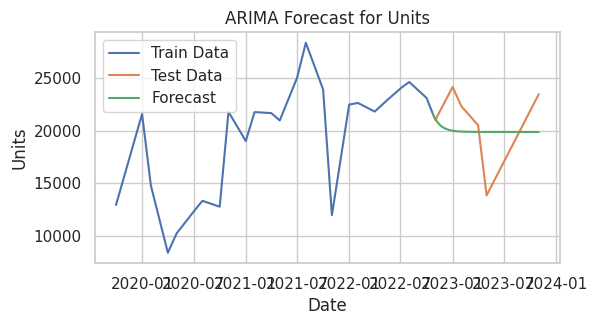

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.13%


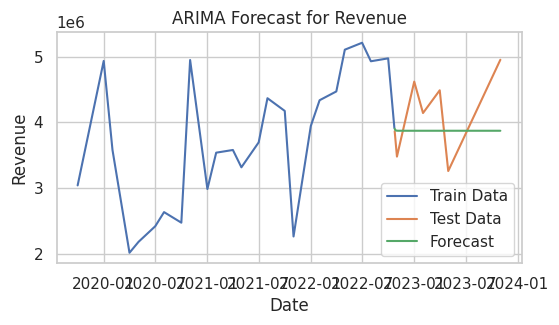

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.10%

--------------------FOR THE PARTNER MARKET: Latin America ----------------------------


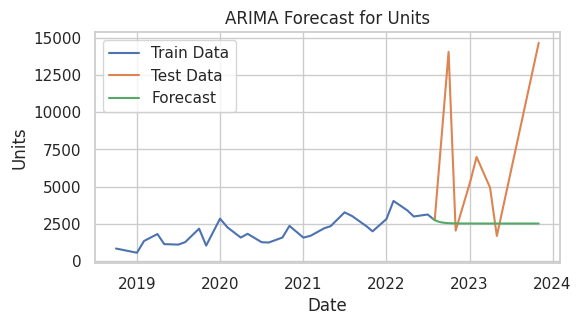

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.53%


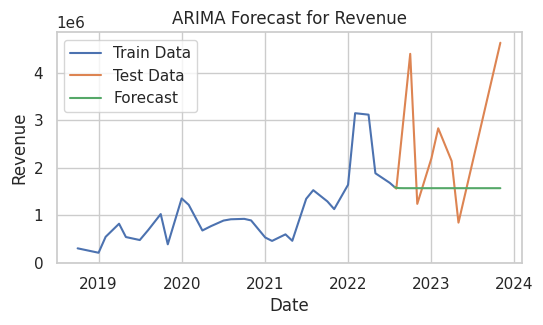

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.36%

--------------------FOR THE PARTNER MARKET: Greater Asia ----------------------------


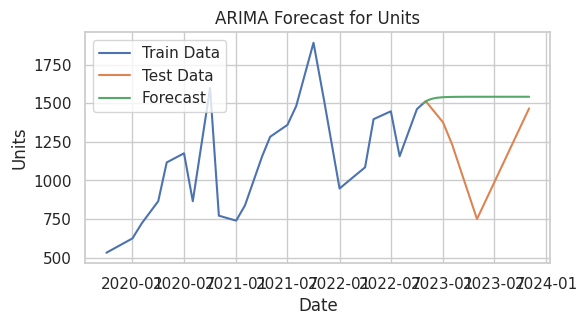

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.38%


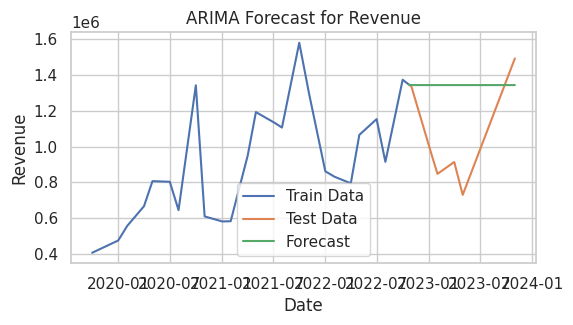

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.33%

--------------------FOR THE PARTNER MARKET: India ----------------------------


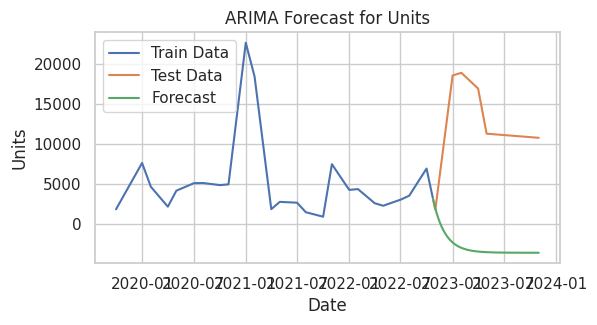

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 1.20%


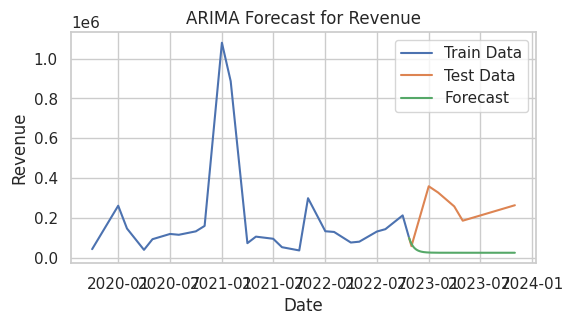

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.85%

--------------------FOR THE PARTNER MARKET: Central and Eastern Europe ----------------------------


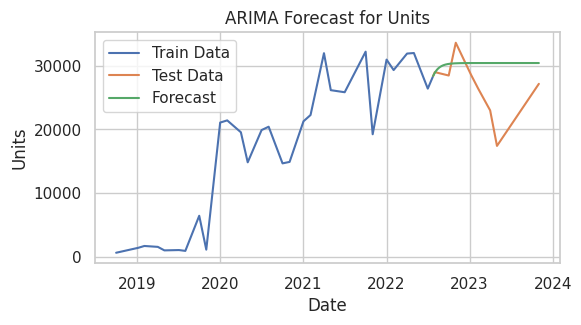

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.23%


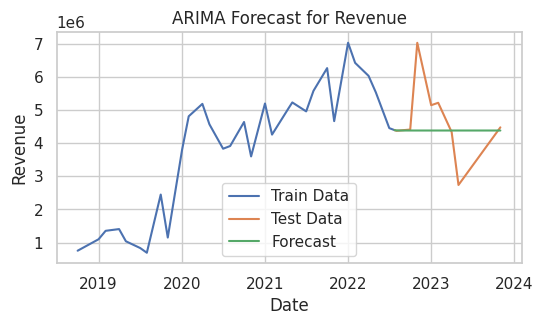

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.18%

--------------------FOR THE PARTNER MARKET: Southern Europe, Middle East and Africa ----------------------------


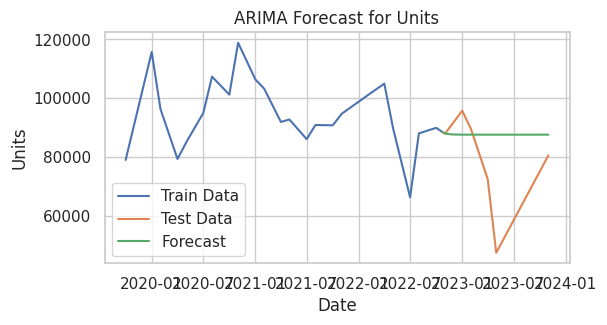

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.26%


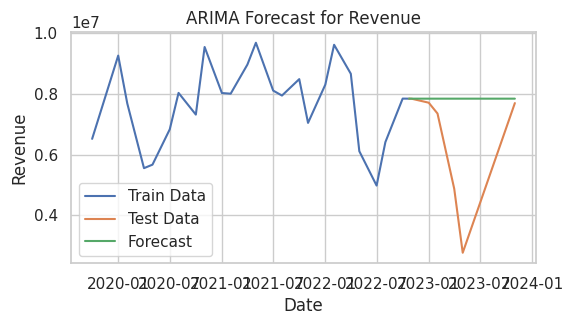

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.45%

--------------------FOR THE PARTNER MARKET: Northwest Europe ----------------------------


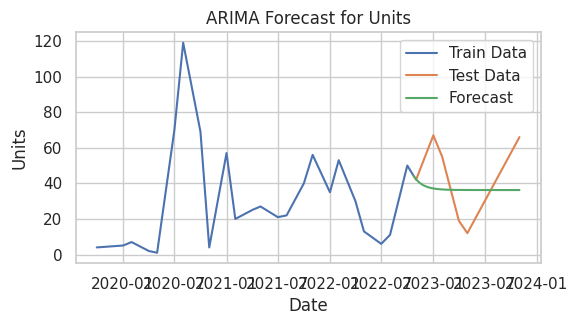

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.45%


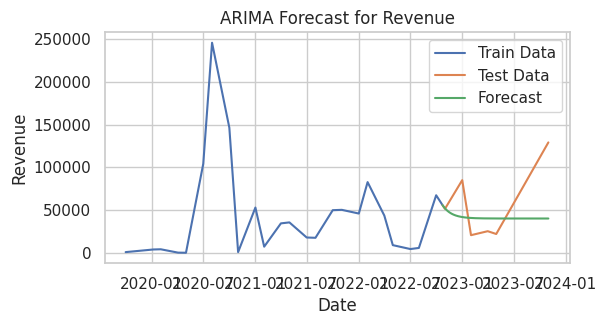

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.48%


In [103]:
for i in MARKET:
  print('')
  print('--------------------FOR THE PARTNER MARKET:', i, '----------------------------')
  dft = df[df['PARTNER_MARKET'] == i]
  arima_func(dft)

### Time-Series Analysis using LSTM:

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

def rnn_func(dataframe):
    # Data preprocessing
    df2 = dataframe[['DATE', 'UNITS', 'REVENUE_USD']]
    df2.set_index('DATE', inplace=True)
    freq = 'D'  # Daily frequency
    df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
    df_re.replace(0, np.nan, inplace=True)
    df_re['UNITS'].interpolate(method='linear', inplace=True)
    df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)

    # Scaling the data for RNN
    scaler_units = MinMaxScaler(feature_range=(0, 1))
    scaler_revenue = MinMaxScaler(feature_range=(0, 1))

    df_re['UNITS'] = scaler_units.fit_transform(df_re[['UNITS']])
    df_re['REVENUE_USD'] = scaler_revenue.fit_transform(df_re[['REVENUE_USD']])

    # Splitting the data into training and testing sets
    train_size = int(0.75 * len(df_re))
    train, test = df_re.iloc[:train_size], df_re.iloc[train_size:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_step - 1):
            dataX.append(dataset[i:(i + time_step), 0])
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

    time_step = 5
    # Preparing data for LSTM - UNITS
    train_units = train[['UNITS']].values
    test_units = test[['UNITS']].values
    X_train_units, y_train_units = create_dataset(train_units, time_step)
    X_test_units, y_test_units = create_dataset(test_units, time_step)

    # Reshape input to be [samples, time steps, features] for LSTM
    X_train_units = X_train_units.reshape(X_train_units.shape[0], X_train_units.shape[1], 1)
    X_test_units = X_test_units.reshape(X_test_units.shape[0], X_test_units.shape[1], 1)

    # LSTM model for forecasting UNITS
    model_units = Sequential()
    model_units.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_units.add(LSTM(50, return_sequences=False))
    model_units.add(Dense(25))
    model_units.add(Dense(1))

    model_units.compile(optimizer=Adam(), loss='mean_squared_error')
    model_units.fit(X_train_units, y_train_units, epochs=10, batch_size=32, verbose=1)

    # Forecast for units
    units_forecast = model_units.predict(X_test_units)
    units_forecast = scaler_units.inverse_transform(units_forecast)

    # Prepare actual test data (aligned with the forecast to handle NaNs)
    actual_units_test = scaler_units.inverse_transform(test_units[time_step+1:])

    # Handle NaN values for MAPE calculation (remove any NaNs)
    valid_indices = ~np.isnan(units_forecast) & ~np.isnan(actual_units_test)
    if valid_indices.sum() > 0:
        mape_units = mean_absolute_percentage_error(actual_units_test[valid_indices], units_forecast[valid_indices])
        print(f"Mean Absolute Percentage Error (MAPE) for UNITS: {mape_units:.2f}%")
    else:
        print("Warning: No valid data points for MAPE calculation.")

    # Plotting UNITS (Train, Test, Forecast)
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, scaler_units.inverse_transform(train_units), label='Train Data')
    plt.plot(test.index, scaler_units.inverse_transform(test_units), label='Test Data')
    plt.plot(test.index[time_step+1:], units_forecast, label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Units')
    plt.title('RNN Forecast for Units')
    plt.legend()
    plt.show()

    # Preparing data for LSTM - REVENUE
    train_revenue = train[['REVENUE_USD']].values
    test_revenue = test[['REVENUE_USD']].values
    X_train_revenue, y_train_revenue = create_dataset(train_revenue, time_step)
    X_test_revenue, y_test_revenue = create_dataset(test_revenue, time_step)

    # Reshape input to be [samples, time steps, features] for LSTM
    X_train_revenue = X_train_revenue.reshape(X_train_revenue.shape[0], X_train_revenue.shape[1], 1)
    X_test_revenue = X_test_revenue.reshape(X_test_revenue.shape[0], X_test_revenue.shape[1], 1)

    # LSTM model for forecasting REVENUE
    model_revenue = Sequential()
    model_revenue.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_revenue.add(LSTM(50, return_sequences=False))
    model_revenue.add(Dense(25))
    model_revenue.add(Dense(1))

    model_revenue.compile(optimizer=Adam(), loss='mean_squared_error')
    model_revenue.fit(X_train_revenue, y_train_revenue, epochs=10, batch_size=32, verbose=1)

    # Forecast for revenue
    revenue_forecast = model_revenue.predict(X_test_revenue)
    revenue_forecast = scaler_revenue.inverse_transform(revenue_forecast)

    # Prepare actual test data (aligned with the forecast)
    actual_revenue_test = scaler_revenue.inverse_transform(test_revenue[time_step+1:])

    # Handle NaN values for MAPE calculation
    valid_indices_revenue = ~np.isnan(revenue_forecast) & ~np.isnan(actual_revenue_test)
    if valid_indices_revenue.sum() > 0:
        mape_revenue = mean_absolute_percentage_error(actual_revenue_test[valid_indices_revenue], revenue_forecast[valid_indices_revenue])
        print(f"Mean Absolute Percentage Error (MAPE) for REVENUE: {mape_revenue:.2f}%")
    else:
        print("Warning: No valid data points for MAPE calculation.")

    # Plotting REVENUE (Train, Test, Forecast)
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, scaler_revenue.inverse_transform(train_revenue), label='Train Data')
    plt.plot(test.index, scaler_revenue.inverse_transform(test_revenue), label='Test Data')
    plt.plot(test.index[time_step+1:], revenue_forecast, label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title('RNN Forecast for Revenue')
    plt.legend()
    plt.show()


#### BU:


--------------------FOR THE BUSINESS UNIT: Printing Supplies ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: nan
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: nan
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


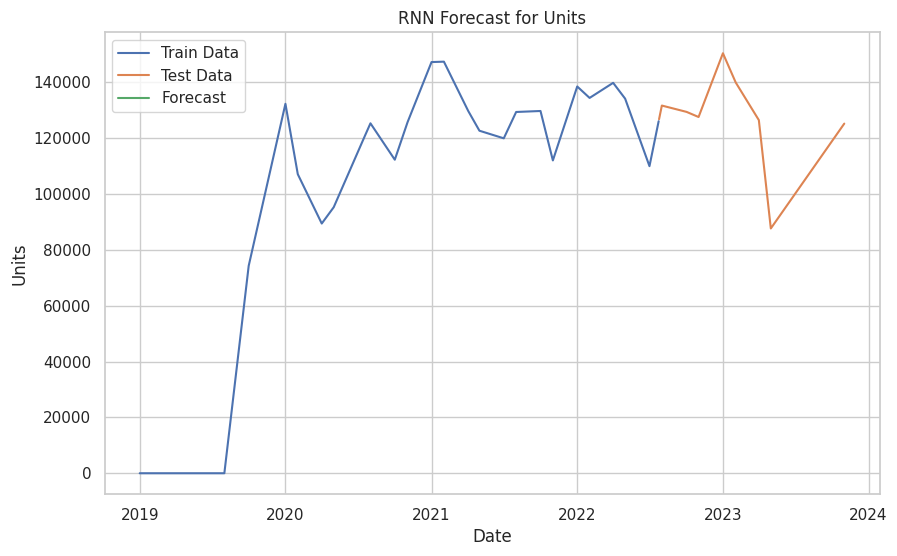

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2137
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6633e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9451e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2224e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8964e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7980e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7040e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9045e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3027e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.01%


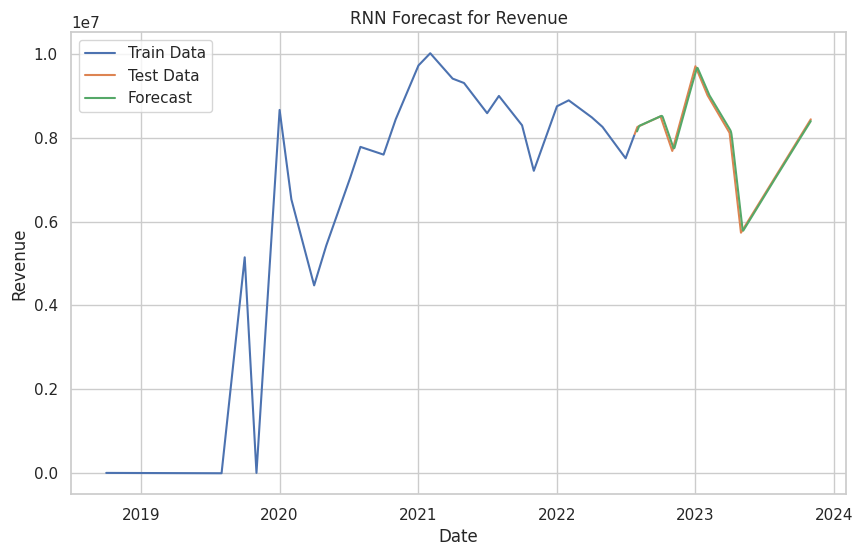


--------------------FOR THE BUSINESS UNIT: Printing HW ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


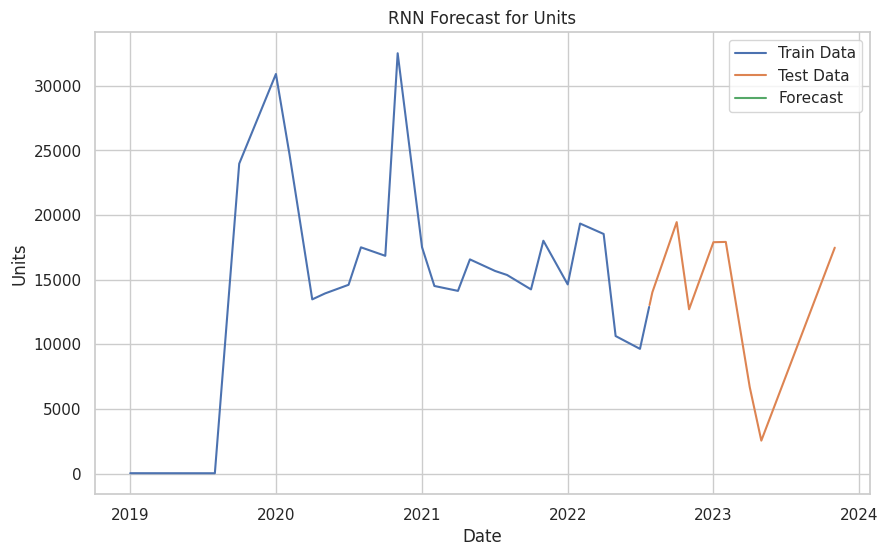

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0810
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.2576e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4704e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4936e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3472e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5453e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1813e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1078e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3701e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4110e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.03%


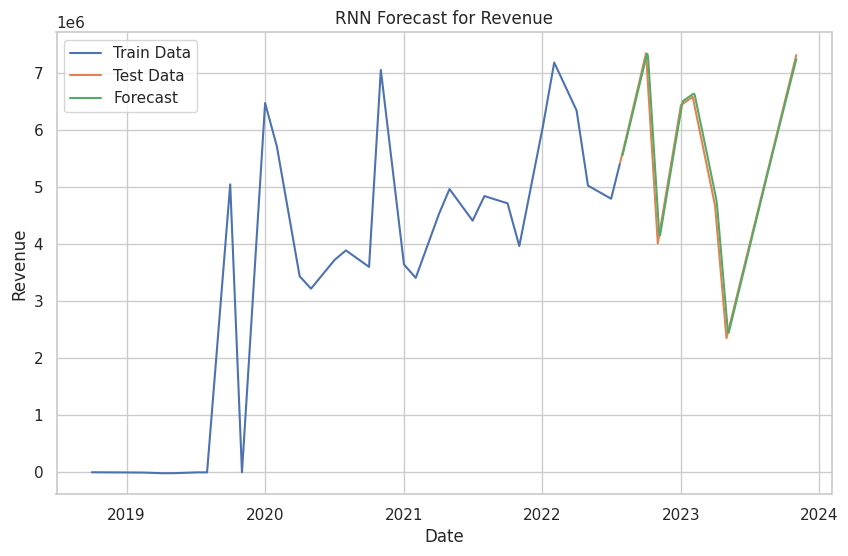


--------------------FOR THE BUSINESS UNIT: Computing ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0372
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4256e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.7458e-05
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1372e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.6455e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.4452e-05
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.6115e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.9345e-05
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.8358e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.6500e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.05%


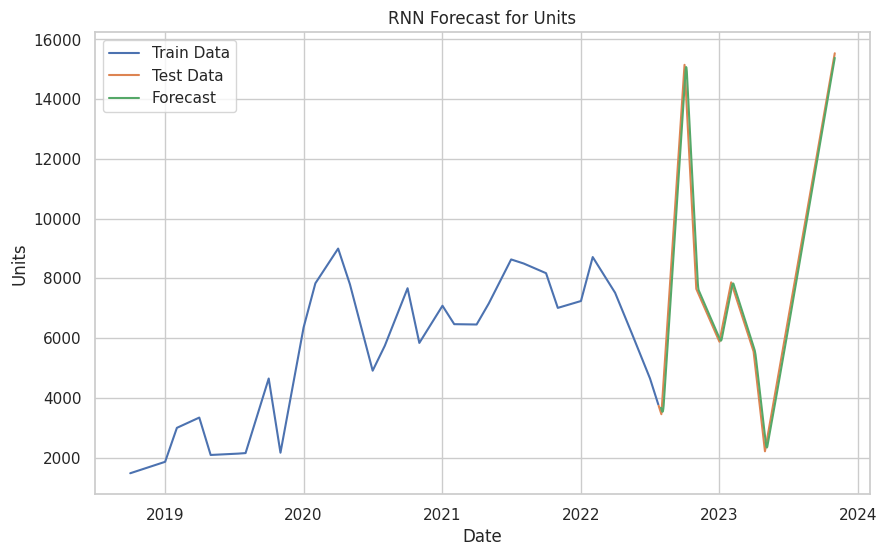

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1189
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3362e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0011e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7115e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7726e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7199e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8820e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.5294e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4544e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.03%


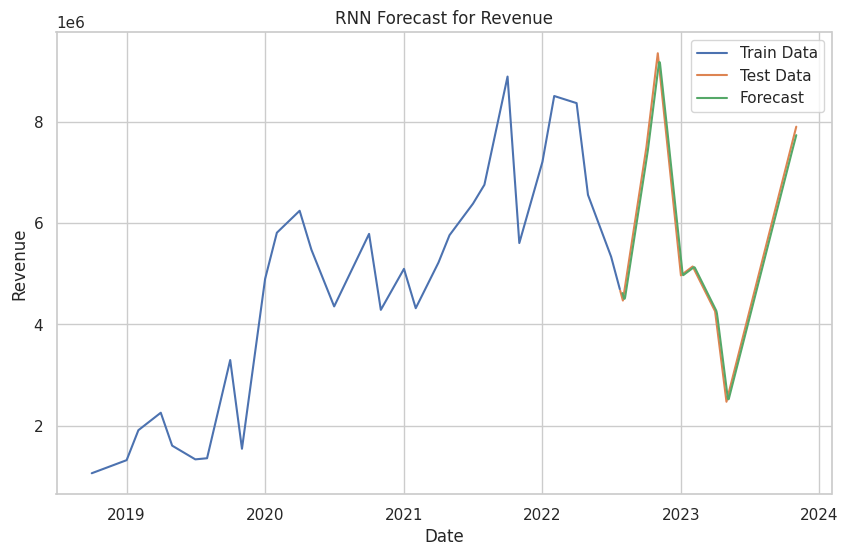

In [105]:
for i in BU:
  print('')
  print('--------------------FOR THE BUSINESS UNIT:', i, '----------------------------')
  dft = df[df['BUSINESS_UNIT'] == i]
  rnn_func(dft)

#### MARKET:


--------------------FOR THE PARTNER MARKET: North America ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1293
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2096e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7999e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0495e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3007e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1124e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2257e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.1846e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9543e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.01%


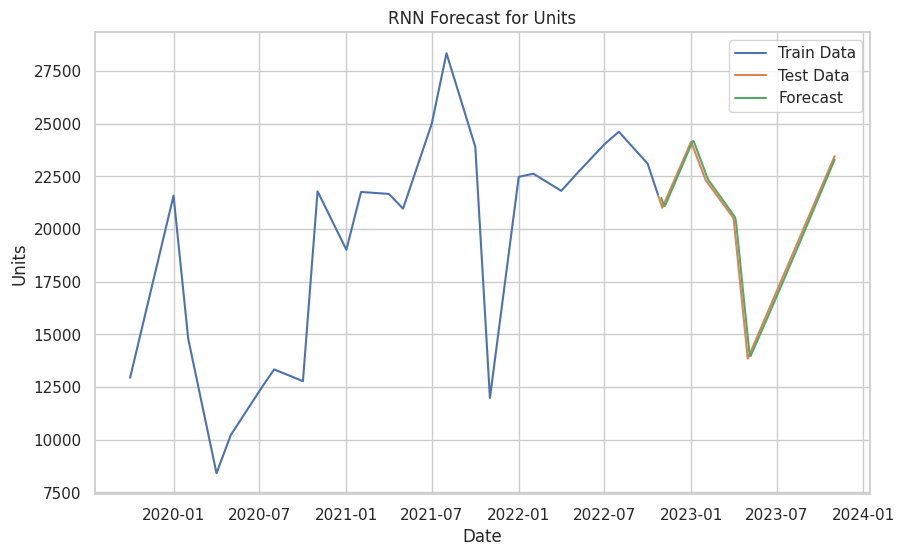

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1605
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7420e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.2635e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5241e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3880e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0222e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9617e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8123e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.01%


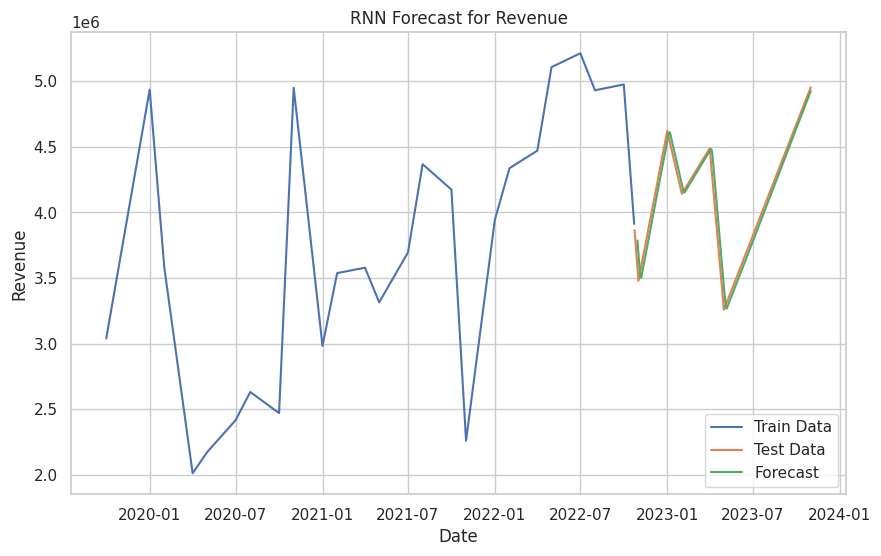


--------------------FOR THE PARTNER MARKET: Latin America ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0045
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4374e-05
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5018e-05
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3410e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4099e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4152e-05
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3560e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3674e-05
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4585e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5423e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.08%


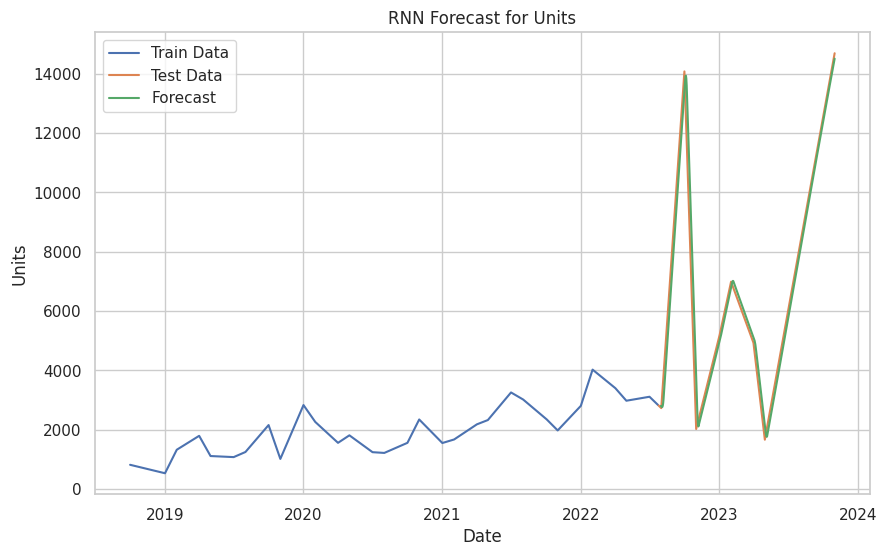

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0208
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4290e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.4003e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.5858e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.9852e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0379e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8731e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2705e-05
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1856e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1280e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.06%


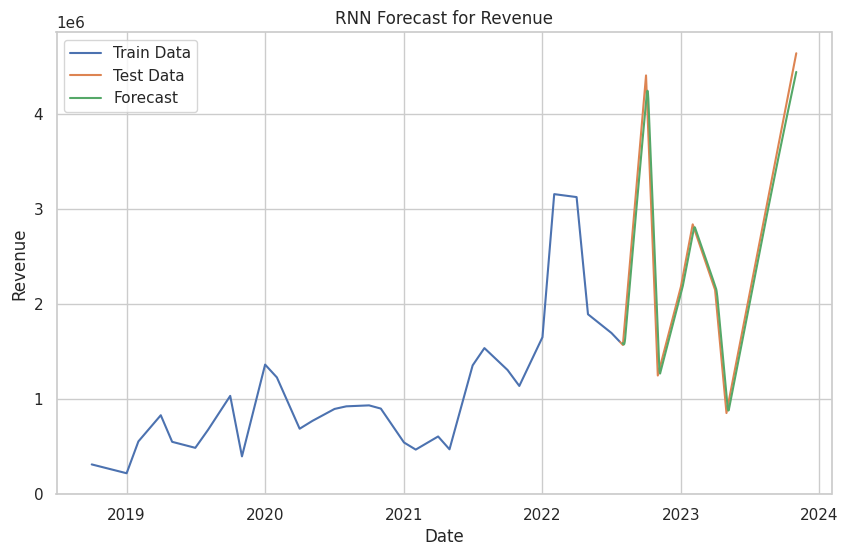


--------------------FOR THE PARTNER MARKET: Greater Asia ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1091
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0394e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1106e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9917e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9410e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7500e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7083e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.5967e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2749e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.02%


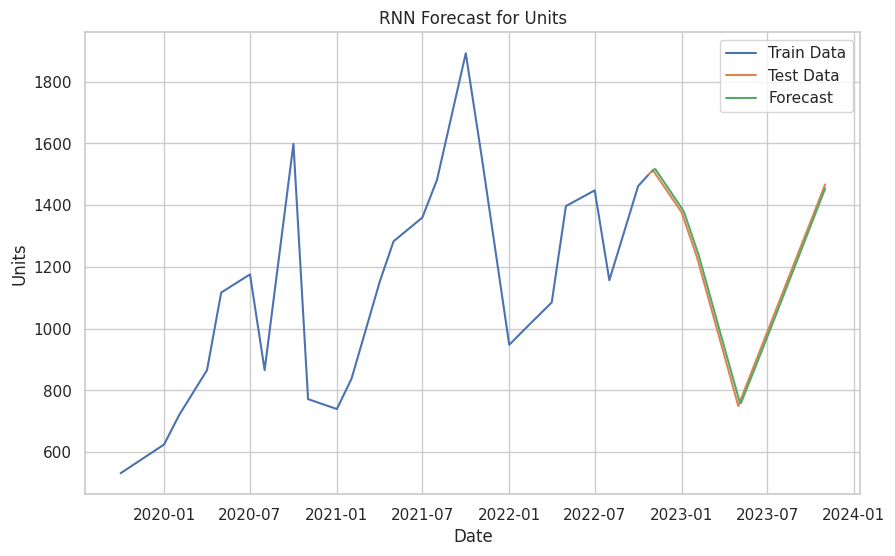

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0946
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8775e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6081e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9238e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8787e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5331e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8792e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6855e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8406e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.02%


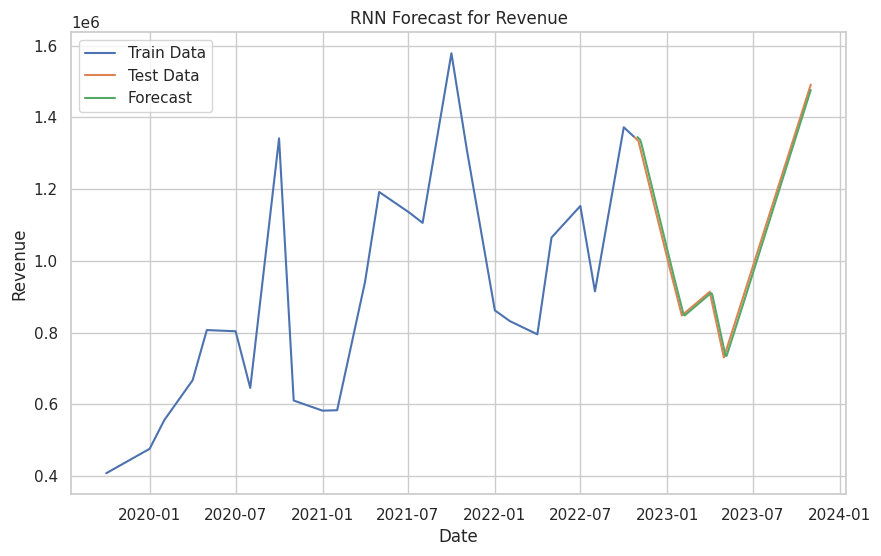


--------------------FOR THE PARTNER MARKET: India ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0349
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0026e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8876e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6043e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5639e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8883e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2042e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7023e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3876e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.04%


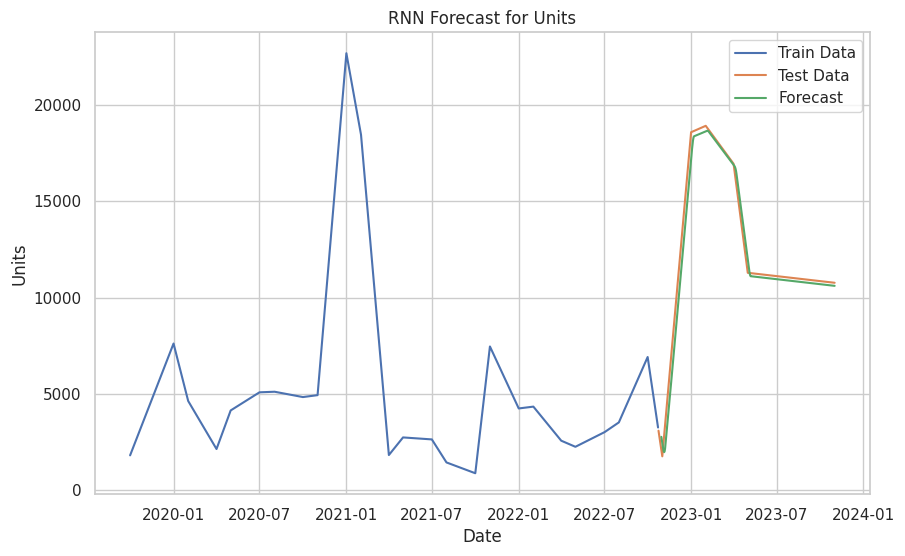

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0310
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.4136e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1184e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6689e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4928e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1239e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5260e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6840e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0050e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4266e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.03%


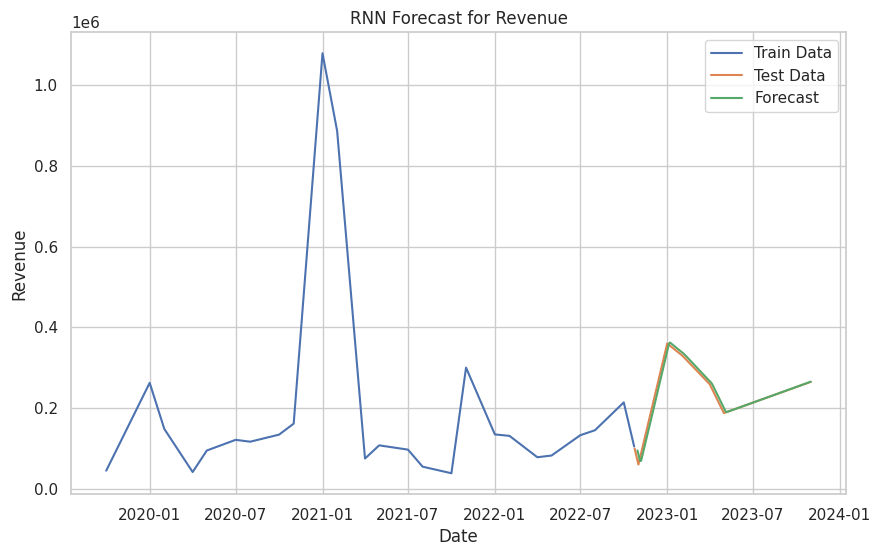


--------------------FOR THE PARTNER MARKET: Central and Eastern Europe ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1434
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.4070e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6384e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6371e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0750e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8297e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9757e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6361e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6599e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.01%


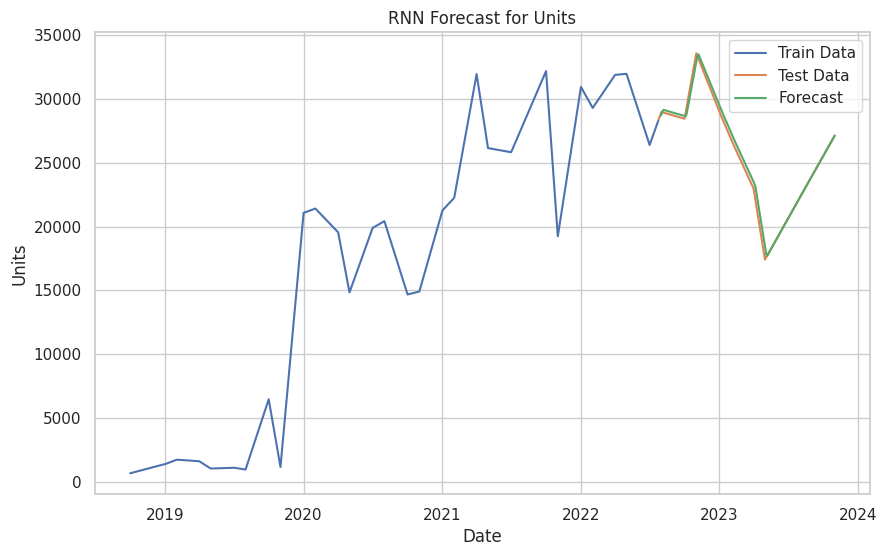

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1039
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1198e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9405e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6700e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5170e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5783e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3942e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3478e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3743e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.02%


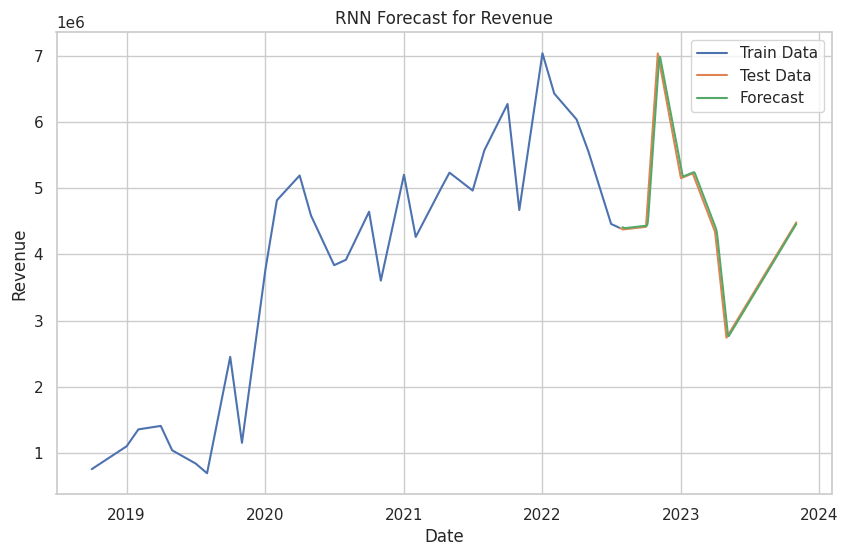


--------------------FOR THE PARTNER MARKET: Southern Europe, Middle East and Africa ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1805
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9169e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3188e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1832e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9107e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9916e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8644e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.03%


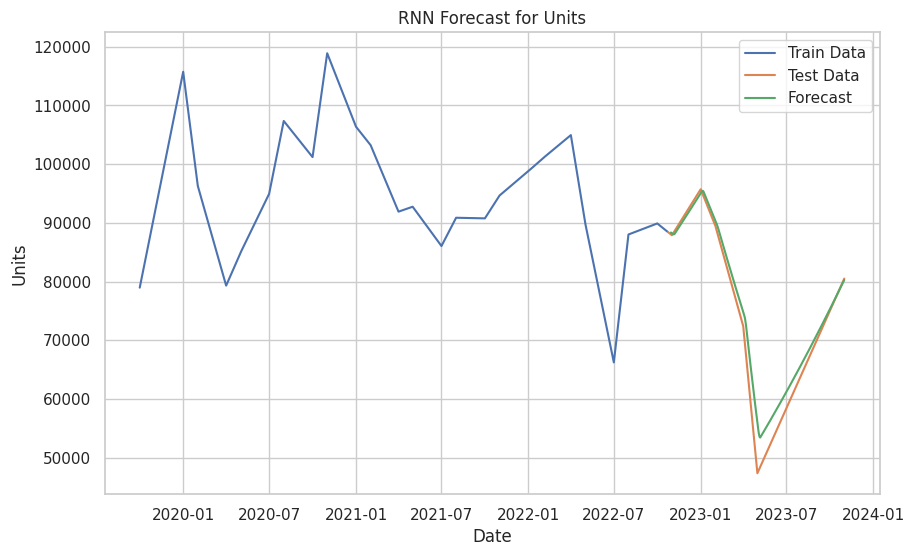

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2774
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7105e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9878e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7944e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7735e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6868e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8570e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.04%


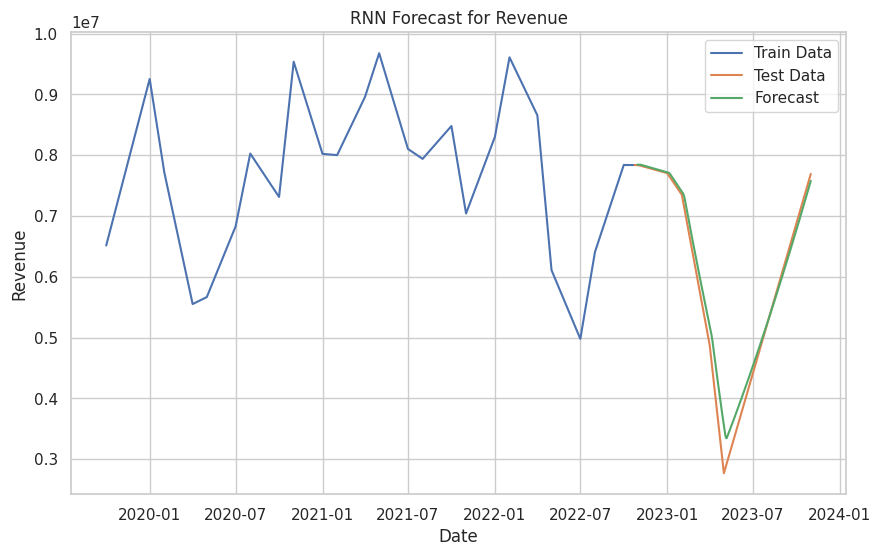


--------------------FOR THE PARTNER MARKET: Northwest Europe ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0667
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5990e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6669e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7529e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1515e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7380e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0615e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0105e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9554e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.04%


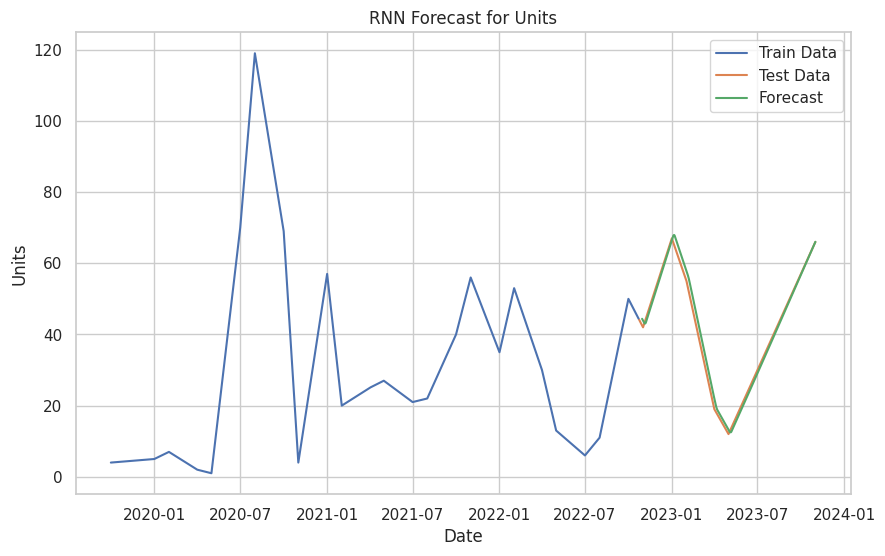

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0320
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.0920e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9754e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0181e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2461e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0191e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0869e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8154e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5847e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.04%


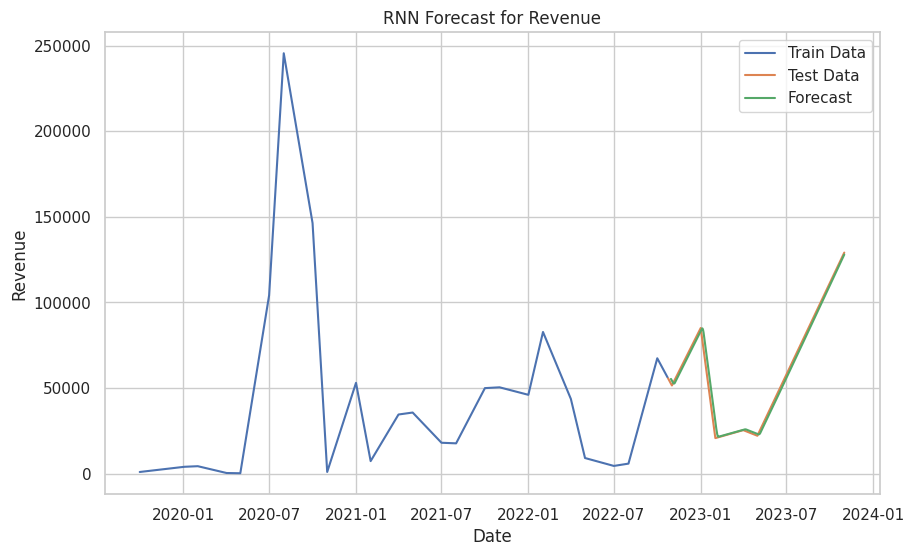

In [106]:
for i in MARKET:
  print('')
  print('--------------------FOR THE PARTNER MARKET:', i, '----------------------------')
  dft = df[df['PARTNER_MARKET'] == i]
  rnn_func(dft)

### Customer Lifetime Value (CLV) Analysis:

In [ ]:
c_df = df.copy()
c_df

DATA_FROM      BUSINESS_UNIT PARTNER_MARKET    PRODUCT_CATEGORY  \
0        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
1        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
2        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
3        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
4        Sell-To  Printing Supplies  North America  OPS Toner Supplies   
...          ...                ...            ...                 ...   
223150   Sell-To  Printing Supplies  North America  OPS Toner Supplies   
223151   Sell-To  Printing Supplies  North America  OPS Toner Supplies   
223152   Sell-To        Printing HW  North America  Office Non Managed   
223153   Sell-To        Printing HW  North America      Office Managed   
223154   Sell-To  Printing Supplies  North America    OPS Ink Supplies   

                                          PARTNER_HQ_NAME    PARTNER_ID  \
0       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
1       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
2       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
3       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
4       Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
...                                                   ...           ...   
223150  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223151  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223152  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223153  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   
223154  Frarowascswasmwaslrar Communwascrarowastwasons...  123HSE4-9637   

       PARTNER_CUSTOMER_ID   PARTNER_LEVEL  IS_OPSI ONLINE_FLAG  \
0                    13690  Power Services     True         NaN   
1                    13438  Power Services     True           N   
2                    15330  Power Services     True           N   
3                    15322  Power Services     True           N   
4                    13521  Power Services     True         NaN   
...                    ...             ...      ...         ...   
223150               67519  Power Services     True           N   
223151               15303  Power Services     True           N   
223152               26103  Power Services     True           N   
223153              WS7038  Power Services     True         NaN   
223154               67425  Power Services     True         NaN   

        PRODUCT_UNITS  REVENUE_USD  UNITS       DATE  \
0                 4.0       391.78    4.0 2020-01-01   
1                 1.0        70.92    1.0 2023-04-01   
2                 1.0       238.73    1.0 2022-10-01   
3                 1.0       200.75    1.0 2023-01-01   
4                 4.0       406.44    4.0 2020-10-01   
...               ...          ...    ...        ...   
223150            3.0       500.36    3.0 2021-05-01   
223151            9.0      1612.35    9.0 2022-08-01   
223152            1.0       783.41    1.0 2021-08-01   
223153            2.0      3672.32    2.0 2020-05-01   
223154            1.0       100.29    1.0 2020-11-01   

                 Continent - Product_Unit  
0       North America - Printing Supplies  
1       North America - Printing Supplies  
2       North America - Printing Supplies  
3       North America - Printing Supplies  
4       North America - Printing Supplies  
...                                   ...  
223150  North America - Printing Supplies  
223151  North America - Printing Supplies  
223152        North America - Printing HW  
223153        North America - Printing HW  
223154  North America - Printing Supplies  

[223155 rows x 15 columns]

#### Average Purchase Value (APV):

In [ ]:
agg_df = c_df.groupby(by=['PARTNER_ID']).agg({'REVENUE_USD': 'sum'})
num_purchases = c_df['PARTNER_ID'].value_counts()
values = []
for index, row in agg_df.iterrows():
  values.append(num_purchases[index])
agg_df['PURCHASES'] = values
agg_df['APV'] = agg_df['REVENUE_USD']/agg_df['PURCHASES']
agg_df

REVENUE_USD  PURCHASES           APV
PARTNER_ID                                          
0345M99-18534  1.133591e+08       9754  11621.802807
0345M99-19291  9.567433e+06       3501   2732.771395
0345M99-19396  1.030195e+08       2985  34512.389025
0345MDH-10365  1.197591e+08     124007    965.744332
123HSE4-9637   9.823354e+07      51353   1912.907482
123HSGW-6484   1.580754e+07       4847   3261.304357
123HSIB-19739  2.826014e+07       1698  16643.192744
123HSIP-5318   2.310311e+07       2080  11107.262423
345161TR5D     1.161411e+07       2164   5366.962930
345SIUD-16849  1.142587e+07       1315   8688.872532
345SIUD-19458  5.034368e+06        970   5190.070495
345SIUD-23225  6.133351e+06       9037    678.693292
6541I5-1147    2.751517e+07       6210   4430.784964
6541WV-1086    1.366872e+06        231   5917.196100
654VOZFNY      3.113119e+06       3003   1036.669737

#### Average Purchase Frequecy (APF):

In [ ]:
unique_customers = c_df['PARTNER_ID'].nunique()
total_puchases = agg_df['PURCHASES'].sum()
APF = total_puchases/unique_customers
APF

14877.0

#### Average Customer Lifespan (ACL):

In [ ]:
part_uniq = c_df['PARTNER_ID'].unique()
max_dates = []
min_dates = []
for index, row in agg_df.iterrows():
  max_dates.append(c_df.loc[c_df['PARTNER_ID'] == index,'DATE'].max())
  min_dates.append(c_df.loc[c_df['PARTNER_ID'] == index,'DATE'].min())
agg_df['MAX_DATE'] = max_dates
agg_df['MIN_DATE'] = min_dates
agg_df['CL'] = ((agg_df.MAX_DATE - agg_df.MIN_DATE)/np.timedelta64(1, 'M'))
agg_df['CL'] = agg_df['CL'].astype(int)
agg_df

REVENUE_USD  PURCHASES           APV   MAX_DATE   MIN_DATE  CL
PARTNER_ID                                                                    
0345M99-18534  1.133591e+08       9754  11621.802807 2023-11-01 2018-10-01  61
0345M99-19291  9.567433e+06       3501   2732.771395 2023-11-01 2019-10-01  49
0345M99-19396  1.030195e+08       2985  34512.389025 2023-11-01 2019-10-01  49
0345MDH-10365  1.197591e+08     124007    965.744332 2023-11-01 2019-10-01  49
123HSE4-9637   9.823354e+07      51353   1912.907482 2023-11-01 2019-10-01  49
123HSGW-6484   1.580754e+07       4847   3261.304357 2023-11-01 2019-10-01  49
123HSIB-19739  2.826014e+07       1698  16643.192744 2023-11-01 2018-10-01  61
123HSIP-5318   2.310311e+07       2080  11107.262423 2023-11-01 2018-10-01  61
345161TR5D     1.161411e+07       2164   5366.962930 2023-11-01 2019-10-01  49
345SIUD-16849  1.142587e+07       1315   8688.872532 2023-11-01 2019-10-01  49
345SIUD-19458  5.034368e+06        970   5190.070495 2023-11-01 2019-10-01  49
345SIUD-23225  6.133351e+06       9037    678.693292 2023-11-01 2019-10-01  49
6541I5-1147    2.751517e+07       6210   4430.784964 2023-11-01 2019-10-01  49
6541WV-1086    1.366872e+06        231   5917.196100 2023-11-01 2019-10-01  49
654VOZFNY      3.113119e+06       3003   1036.669737 2023-11-01 2019-10-01  49

In [ ]:
ACL = agg_df['CL'].sum()/unique_customers
ACL

51.4

#### Customer Lifecycle Value (CLV)

In [ ]:
agg_df['CLV'] = agg_df['APV'] * APF * ACL
agg_df

REVENUE_USD  PURCHASES           APV   MAX_DATE   MIN_DATE  \
PARTNER_ID                                                                   
0345M99-18534  1.133591e+08       9754  11621.802807 2023-11-01 2018-10-01   
0345M99-19291  9.567433e+06       3501   2732.771395 2023-11-01 2019-10-01   
0345M99-19396  1.030195e+08       2985  34512.389025 2023-11-01 2019-10-01   
0345MDH-10365  1.197591e+08     124007    965.744332 2023-11-01 2019-10-01   
123HSE4-9637   9.823354e+07      51353   1912.907482 2023-11-01 2019-10-01   
123HSGW-6484   1.580754e+07       4847   3261.304357 2023-11-01 2019-10-01   
123HSIB-19739  2.826014e+07       1698  16643.192744 2023-11-01 2018-10-01   
123HSIP-5318   2.310311e+07       2080  11107.262423 2023-11-01 2018-10-01   
345161TR5D     1.161411e+07       2164   5366.962930 2023-11-01 2019-10-01   
345SIUD-16849  1.142587e+07       1315   8688.872532 2023-11-01 2019-10-01   
345SIUD-19458  5.034368e+06        970   5190.070495 2023-11-01 2019-10-01   
345SIUD-23225  6.133351e+06       9037    678.693292 2023-11-01 2019-10-01   
6541I5-1147    2.751517e+07       6210   4430.784964 2023-11-01 2019-10-01   
6541WV-1086    1.366872e+06        231   5917.196100 2023-11-01 2019-10-01   
654VOZFNY      3.113119e+06       3003   1036.669737 2023-11-01 2019-10-01   

               CL           CLV  
PARTNER_ID                       
0345M99-18534  61  8.886935e+09  
0345M99-19291  49  2.089690e+09  
0345M99-19396  49  2.639086e+10  
0345MDH-10365  49  7.384833e+08  
123HSE4-9637   49  1.462758e+09  
123HSGW-6484   49  2.493847e+09  
123HSIB-19739  61  1.272668e+10  
123HSIP-5318   61  8.493477e+09  
345161TR5D     49  4.103997e+09  
345SIUD-16849  49  6.644188e+09  
345SIUD-19458  49  3.968732e+09  
345SIUD-23225  49  5.189817e+08  
6541I5-1147    49  3.388123e+09  
6541WV-1086    49  4.524748e+09  
654VOZFNY      49  7.927183e+08

In [ ]:
continent = []
prodtype = []
for index, row in agg_df.iterrows():
  continent.append(c_df.loc[c_df['PARTNER_ID'] == index,'PARTNER_MARKET'].iloc[0])
  prodtype.append(c_df.loc[c_df['PARTNER_ID'] == index,'BUSINESS_UNIT'].iloc[0])
agg_df['PARTNER_MARKET'] = continent
agg_df['BUSINESS_UNIT'] = prodtype
agg_df

REVENUE_USD  PURCHASES           APV   MAX_DATE   MIN_DATE  \
PARTNER_ID                                                                   
0345M99-18534  1.133591e+08       9754  11621.802807 2023-11-01 2018-10-01   
0345M99-19291  9.567433e+06       3501   2732.771395 2023-11-01 2019-10-01   
0345M99-19396  1.030195e+08       2985  34512.389025 2023-11-01 2019-10-01   
0345MDH-10365  1.197591e+08     124007    965.744332 2023-11-01 2019-10-01   
123HSE4-9637   9.823354e+07      51353   1912.907482 2023-11-01 2019-10-01   
123HSGW-6484   1.580754e+07       4847   3261.304357 2023-11-01 2019-10-01   
123HSIB-19739  2.826014e+07       1698  16643.192744 2023-11-01 2018-10-01   
123HSIP-5318   2.310311e+07       2080  11107.262423 2023-11-01 2018-10-01   
345161TR5D     1.161411e+07       2164   5366.962930 2023-11-01 2019-10-01   
345SIUD-16849  1.142587e+07       1315   8688.872532 2023-11-01 2019-10-01   
345SIUD-19458  5.034368e+06        970   5190.070495 2023-11-01 2019-10-01   
345SIUD-23225  6.133351e+06       9037    678.693292 2023-11-01 2019-10-01   
6541I5-1147    2.751517e+07       6210   4430.784964 2023-11-01 2019-10-01   
6541WV-1086    1.366872e+06        231   5917.196100 2023-11-01 2019-10-01   
654VOZFNY      3.113119e+06       3003   1036.669737 2023-11-01 2019-10-01   

               CL           CLV                           PARTNER_MARKET  \
PARTNER_ID                                                                 
0345M99-18534  61  8.886935e+09               Central and Eastern Europe   
0345M99-19291  49  2.089690e+09               Central and Eastern Europe   
0345M99-19396  49  2.639086e+10  Southern Europe, Middle East and Africa   
0345MDH-10365  49  7.384833e+08  Southern Europe, Middle East and Africa   
123HSE4-9637   49  1.462758e+09                            North America   
123HSGW-6484   49  2.493847e+09                            North America   
123HSIB-19739  61  1.272668e+10                            Latin America   
123HSIP-5318   61  8.493477e+09                            Latin America   
345161TR5D     49  4.103997e+09                             Greater Asia   
345SIUD-16849  49  6.644188e+09                             Greater Asia   
345SIUD-19458  49  3.968732e+09                             Greater Asia   
345SIUD-23225  49  5.189817e+08                                    India   
6541I5-1147    49  3.388123e+09               Central and Eastern Europe   
6541WV-1086    49  4.524748e+09                         Northwest Europe   
654VOZFNY      49  7.927183e+08               Central and Eastern Europe   

                   BUSINESS_UNIT  
PARTNER_ID                        
0345M99-18534        Printing HW  
0345M99-19291  Printing Supplies  
0345M99-19396        Printing HW  
0345MDH-10365          Computing  
123HSE4-9637   Printing Supplies  
123HSGW-6484   Printing Supplies  
123HSIB-19739        Printing HW  
123HSIP-5318   Printing Supplies  
345161TR5D             Computing  
345SIUD-16849          Computing  
345SIUD-19458        Printing HW  
345SIUD-23225  Printing Supplies  
6541I5-1147    Printing Supplies  
6541WV-1086          Printing HW  
654VOZFNY              Computing

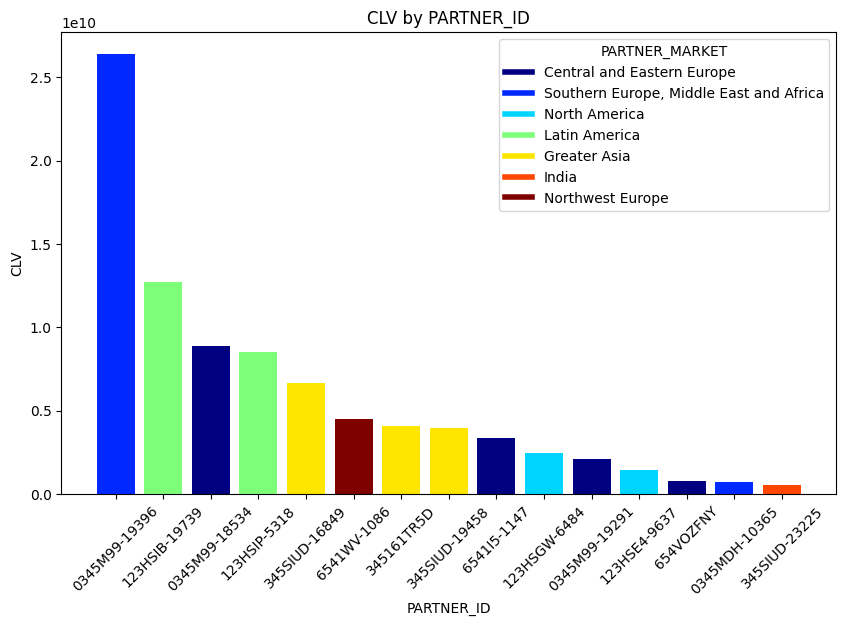

In [ ]:
unique_continents = agg_df['PARTNER_MARKET'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_continents)))

continent_colors = {PARTNER_MARKET: color for PARTNER_MARKET, color in zip(unique_continents, colors)}
agg_df['color'] = agg_df['PARTNER_MARKET'].map(continent_colors)
plt.figure(figsize=(10, 6))
agg_df = agg_df.sort_values(by=['CLV'],ascending=False)
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=continent_colors[PARTNER_MARKET], lw=4, label=PARTNER_MARKET) for PARTNER_MARKET in unique_continents]
plt.legend(handles=legend_labels, title='PARTNER_MARKET')
plt.show()

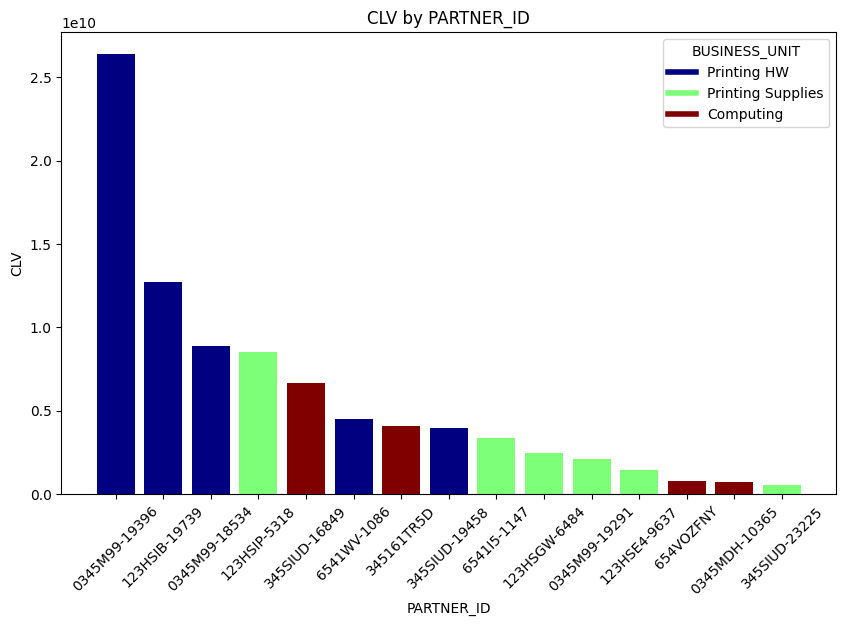

In [ ]:
unique_continents = agg_df['BUSINESS_UNIT'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_continents)))

continent_colors = {BUSINESS_UNIT: color for BUSINESS_UNIT, color in zip(unique_continents, colors)}
agg_df['color'] = agg_df['BUSINESS_UNIT'].map(continent_colors)
plt.figure(figsize=(10, 6))
agg_df = agg_df.sort_values(by=['CLV'],ascending=False)
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=continent_colors[PARTNER_MARKET], lw=4, label=PARTNER_MARKET) for PARTNER_MARKET in unique_continents]
plt.legend(handles=legend_labels, title='BUSINESS_UNIT')
plt.show()

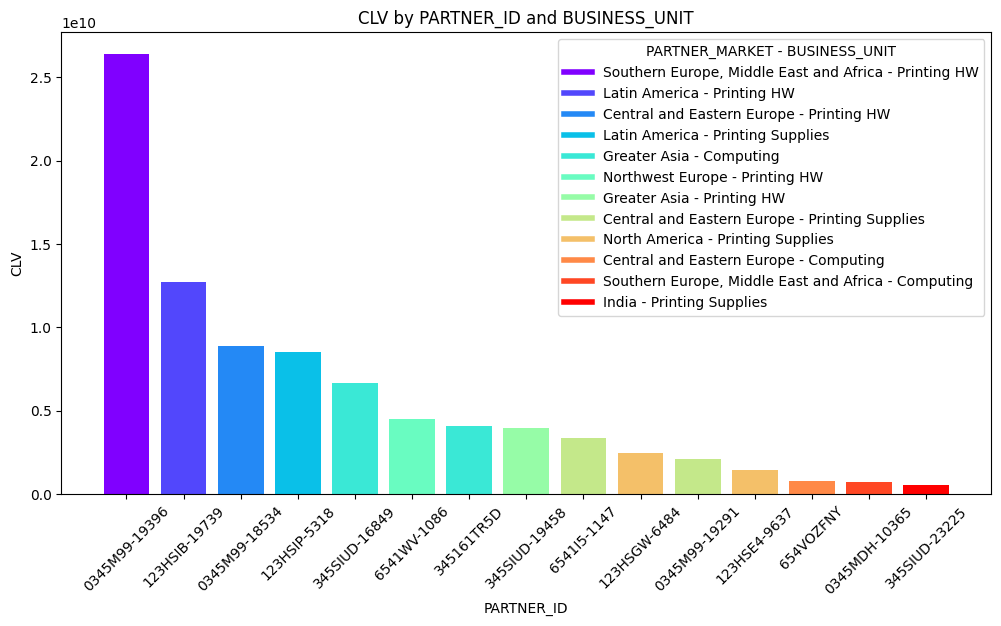

In [ ]:
unique_combinations = agg_df[['PARTNER_MARKET', 'BUSINESS_UNIT']].drop_duplicates()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_combinations)))
combination_colors = {tuple(combination): color for combination, color in zip(unique_combinations.values, colors)}
agg_df['color'] = [combination_colors[tuple(combination)] for combination in agg_df[['PARTNER_MARKET', 'BUSINESS_UNIT']].values]
plt.figure(figsize=(12, 6))
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID and BUSINESS_UNIT')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=f'{PARTNER_MARKET} - {BUSINESS_UNIT}')
                 for (PARTNER_MARKET, BUSINESS_UNIT), color in combination_colors.items()]
plt.legend(handles=legend_labels, title='PARTNER_MARKET - BUSINESS_UNIT')
plt.show()